# Pendahuluan

Ujian Tulis Berbasis Komputer (UTBK) merupakan salah satu tahap seleksi dalam penerimaan mahasiswa baru di Perguruan Tinggi Negeri (PTN) di Indonesia. Setiap tahunnya, ratusan ribu peserta bersaing untuk mendapatkan kursi di program studi impian mereka. Dengan melakukan eksplorasi dan analisis data UTBK 2019, kita dapat memperoleh wawasan berharga terkait pola penerimaan mahasiswa dan memetakan strategi yang tepat untuk memperbesar peluang penerimaan.

# Tujuan

Project ini bertujuan untuk:

- **Melakukan Exploratory Data Analysis (EDA)** guna memahami distribusi skor UTBK dan karakteristik peserta.
- **Menganalisis hubungan antara skor UTBK dan tingkat kelulusan** menggunakan uji statistik, seperti Mann-Whitney U Test dan uji Chi-Square.
- **Mengidentifikasi kemungkinan anomali**, seperti peserta dengan nilai tinggi yang tidak lolos seleksi.
- **Membangun sistem klasifikasi sederhana** untuk menentukan apakah peserta diterima di pilihan pertama, pilihan kedua, atau tidak lolos.

# Metode

Beberapa metode statistik dan teknik analisis yang diterapkan dalam proyek ini antara lain:

- **Exploratory Data Analysis (EDA)**: Visualisasi distribusi skor dan kelulusan.
- **Uji Mann-Whitney**: Untuk menguji perbedaan distribusi nilai antara peserta yang diterima dan tidak diterima.
- **Uji Chi-Square**: Untuk mengetahui apakah terdapat hubungan signifikan antara kategori PTN (Top 3 vs. lainnya) dan tingkat kelulusan.
- **Analisis Anomali**: Identifikasi peserta dengan skor tinggi namun tidak lolos seleksi.
- **Model Sederhana untuk Prediksi Kelulusan**: Menggunakan aturan sederhana untuk menentukan status kelulusan peserta berdasarkan skor UTBK.

# Importing the Dataset

In [10]:
#Import library pandas untuk membuka dataset
import pandas as pd

#Mengimpor data
major = pd.read_csv("C:/Users/ACER/Downloads/archive (4)/majors.csv")
soshum = pd.read_csv("C:/Users/ACER/Downloads/archive (4)/score_humanities.csv")
saintek = pd.read_csv("C:/Users/ACER/Downloads/archive (4)/score_science.csv")
univ = pd.read_csv("C:/Users/ACER/Downloads/archive (4)/universities.csv")

# Checking the Dataset

In [12]:
major.head(1)

,Unnamed: 0,id_major,id_university,type,major_name,capacity
0,0,1111014,111,science,PENDIDIKAN DOKTER HEWAN,88


In [13]:
soshum.head(1)

,Unnamed: 0,id_first_major,id_first_university,id_second_major,id_second_university,id_user,score_eko,score_geo,score_kmb,score_kpu,score_kua,score_mat,score_ppu,score_sej,score_sos
0,0,3322014,332,3532154,353,26,778,486,679,594,643,686,559,392,676


In [14]:
saintek.head(1)

,Unnamed: 0,id_first_major,id_first_university,id_second_major,id_second_university,id_user,score_bio,score_fis,score_kim,score_kmb,score_kpu,score_kua,score_mat,score_ppu
0,0,3321065,332,3331187,333,4,400,400,400,400,400,400,400,400


In [15]:
univ.head(1)

,Unnamed: 0,id_university,university_name
0,0,111,UNIVERSITAS SYIAH KUALA


In [16]:
#Mengecek null di masing-masing dataframe
dfs = {"Major": major, "Soshum": soshum, "Saintek": saintek, "Univ": univ}

for name, df in dfs.items():
    print(f"Jumlah nilai null di dataframe {name}:\n{df.isnull().sum().sum()}\n")

Jumlah nilai null di dataframe Major:
0

Jumlah nilai null di dataframe Soshum:
0

Jumlah nilai null di dataframe Saintek:
0

Jumlah nilai null di dataframe Univ:
0



In [17]:
#Mengecek duplikat di masing-masing dataframe
for name, df in dfs.items():
    print(f"Jumlah data duplikat di dataframe {name}:\n{df.duplicated().sum()}\n")

Jumlah data duplikat di dataframe Major:
0

Jumlah data duplikat di dataframe Soshum:
0

Jumlah data duplikat di dataframe Saintek:
0

Jumlah data duplikat di dataframe Univ:
0



In [18]:
#Membuang kolom yang tidak digunakan
column_to_drop = 'Unnamed: 0'

major.drop(column_to_drop, axis=1, inplace=True)
soshum.drop(column_to_drop, axis=1, inplace=True)
saintek.drop(column_to_drop, axis=1, inplace=True)
univ.drop(column_to_drop, axis=1, inplace=True)

# Data Wrangling

In [20]:
#Mengumpulkan data pilihan jurusan pertama pada peserta UTBK Soshum
data_soshum = pd.merge(major, soshum, how='inner', left_on='id_major', 
            right_on='id_first_major').drop(['id_major', 
            'id_university'], axis=1)

data_soshum.rename(columns={'type':'type_fm', 'major_name':'fm_name', 'capacity':'fm_capacity'}, inplace=True)

#Mengumpulkan data pilihan jurusan kedua pada peserta UTBK Soshum
data_soshum = pd.merge(major, data_soshum, how='inner', left_on='id_major', 
         right_on='id_second_major').drop(['id_major', 
        'id_university'], axis=1).rename(columns={'type':'type_sm', 'major_name':'sm_name', 'capacity':'sm_capacity'})

data_soshum.head(1)

,type_sm,sm_name,sm_capacity,type_fm,fm_name,fm_capacity,id_first_major,id_first_university,id_second_major,id_second_university,id_user,score_eko,score_geo,score_kmb,score_kpu,score_kua,score_mat,score_ppu,score_sej,score_sos
0,humanities,EKONOMI PEMBANGUNAN,64,humanities,MANAJEMEN,64,1112025,111,1112017,111,32368,562,604,322,680,450,437,514,530,539


In [21]:
#Mengumpulkan data pilihan universitas pertama dan kedua pada peserta UTBK Soshum
data_soshum = pd.merge(univ, data_soshum, left_on='id_university', right_on='id_first_university', how='inner').drop(
    'id_university', axis=1).rename(columns={'university_name':'first_univ'})

data_soshum = pd.merge(univ, data_soshum, left_on='id_university', right_on='id_second_university', how='inner').drop(
    'id_university', axis=1
).rename(columns={'university_name':'second_univ'})

data_soshum.head()

,second_univ,first_univ,type_sm,sm_name,sm_capacity,type_fm,fm_name,fm_capacity,id_first_major,id_first_university,...,id_user,score_eko,score_geo,score_kmb,score_kpu,score_kua,score_mat,score_ppu,score_sej,score_sos
0,UNIVERSITAS SYIAH KUALA,UNIVERSITAS SYIAH KUALA,humanities,EKONOMI PEMBANGUNAN,64,humanities,MANAJEMEN,64,1112025,111,...,32368,562,604,322,680,450,437,514,530,539
1,UNIVERSITAS SYIAH KUALA,UNIVERSITAS SYIAH KUALA,humanities,EKONOMI PEMBANGUNAN,64,humanities,MANAJEMEN,64,1112025,111,...,66250,673,475,539,484,483,672,465,620,634
2,UNIVERSITAS SYIAH KUALA,UNIVERSITAS SYIAH KUALA,humanities,EKONOMI PEMBANGUNAN,64,humanities,MANAJEMEN,64,1112025,111,...,208174,480,385,730,596,474,691,271,574,453
3,UNIVERSITAS SYIAH KUALA,UNIVERSITAS SYIAH KUALA,humanities,EKONOMI PEMBANGUNAN,64,humanities,AKUNTANSI,64,1112033,111,...,123221,476,705,664,578,487,577,484,565,604
4,UNIVERSITAS SYIAH KUALA,UNIVERSITAS SYIAH KUALA,humanities,EKONOMI PEMBANGUNAN,64,humanities,AKUNTANSI,64,1112033,111,...,214236,525,555,546,563,381,561,357,476,607


In [22]:
#Mengumpulkan data pilihan jurusan pertama pada peserta UTBK Saintek
data_saintek = pd.merge(major, saintek, left_on='id_major', right_on='id_first_major', how='inner').drop(
    ['id_major', 'id_university'], axis=1
).rename(columns={
    'type':'fm_type', 'major_name':'fm_name', 'capacity':'fm_capacity'}
)

#Mengumpulkan data pilihan jurusan kedua pada peserta UTBK Saintek
data_saintek = pd.merge(major, data_saintek, how='inner', left_on='id_major', right_on='id_second_major').drop(
    ['id_major', 'id_university'], axis=1
).rename(columns={
    'type':'sm_type', 'major_name':'sm_name', 'capacity':'sm_capacity'
})

data_saintek.head(1)

,sm_type,sm_name,sm_capacity,fm_type,fm_name,fm_capacity,id_first_major,id_first_university,id_second_major,id_second_university,id_user,score_bio,score_fis,score_kim,score_kmb,score_kpu,score_kua,score_mat,score_ppu
0,science,PENDIDIKAN DOKTER HEWAN,88,science,PENDIDIKAN DOKTER HEWAN,88,1111014,111,1111014,111,28207,453,689,714,532,612,771,565,605


In [23]:
#Mengumpulkan data pilihan universitas pertama dan kedua pada peserta UTBK Saintek
data_saintek = pd.merge(univ, data_saintek, left_on='id_university', right_on='id_first_university', how='inner').drop(
    'id_university', axis=1).rename(columns={'university_name':'first_univ'})

data_saintek = pd.merge(univ, data_saintek, left_on='id_university', right_on='id_second_university', how='inner').drop(
    'id_university', axis=1
).rename(columns={'university_name':'second_univ'})

data_saintek.head()

,second_univ,first_univ,sm_type,sm_name,sm_capacity,fm_type,fm_name,fm_capacity,id_first_major,id_first_university,...,id_second_university,id_user,score_bio,score_fis,score_kim,score_kmb,score_kpu,score_kua,score_mat,score_ppu
0,UNIVERSITAS SYIAH KUALA,UNIVERSITAS SYIAH KUALA,science,PENDIDIKAN DOKTER HEWAN,88,science,PENDIDIKAN DOKTER HEWAN,88,1111014,111,...,111,28207,453,689,714,532,612,771,565,605
1,UNIVERSITAS SYIAH KUALA,UNIVERSITAS SYIAH KUALA,science,PENDIDIKAN DOKTER HEWAN,88,science,PENDIDIKAN DOKTER HEWAN,88,1111014,111,...,111,169351,453,601,552,643,561,497,699,637
2,UNIVERSITAS SYIAH KUALA,UNIVERSITAS SYIAH KUALA,science,PENDIDIKAN DOKTER HEWAN,88,science,TEKNIK SIPIL,64,1111022,111,...,111,176179,327,738,468,435,473,489,526,561
3,UNIVERSITAS SYIAH KUALA,UNIVERSITAS SYIAH KUALA,science,PENDIDIKAN DOKTER HEWAN,88,science,TEKNIK SIPIL,64,1111022,111,...,111,337827,460,382,471,564,494,454,421,556
4,UNIVERSITAS SYIAH KUALA,UNIVERSITAS SYIAH KUALA,science,PENDIDIKAN DOKTER HEWAN,88,science,TEKNIK PERTANIAN,40,1111111,111,...,111,241715,487,497,440,529,600,501,611,659


In [24]:
data_saintek.columns

Index(['second_univ', 'first_univ', 'sm_type', 'sm_name', 'sm_capacity',
       'fm_type', 'fm_name', 'fm_capacity', 'id_first_major',
       'id_first_university', 'id_second_major', 'id_second_university',
       'id_user', 'score_bio', 'score_fis', 'score_kim', 'score_kmb',
       'score_kpu', 'score_kua', 'score_mat', 'score_ppu'],
      dtype='object')

In [25]:
data_soshum.columns

Index(['second_univ', 'first_univ', 'type_sm', 'sm_name', 'sm_capacity',
       'type_fm', 'fm_name', 'fm_capacity', 'id_first_major',
       'id_first_university', 'id_second_major', 'id_second_university',
       'id_user', 'score_eko', 'score_geo', 'score_kmb', 'score_kpu',
       'score_kua', 'score_mat', 'score_ppu', 'score_sej', 'score_sos'],
      dtype='object')

In [26]:
# Menyamakan nama kolom sebelum menggabungkan
data_soshum = data_soshum.rename(columns={'type_sm': 'sm_type', 'type_fm': 'fm_type'})
data_saintek = data_saintek.rename(columns={'sm_type': 'sm_type', 'fm_type': 'fm_type'})  # Tidak berubah, hanya untuk konsistensi

# Menggabungkan dataset dengan concat
combined_data = pd.concat([data_soshum, data_saintek], ignore_index=True)

# Feature Engineering

### Membuat kolom rata-rata skor

In [29]:
#Membuat kolom rata-rata skor pada peserta soshum
data_soshum["avg"] = round(data_soshum.filter(like="score_").mean(axis=1),2)
data_soshum.head()

,second_univ,first_univ,sm_type,sm_name,sm_capacity,fm_type,fm_name,fm_capacity,id_first_major,id_first_university,...,score_eko,score_geo,score_kmb,score_kpu,score_kua,score_mat,score_ppu,score_sej,score_sos,avg
0,UNIVERSITAS SYIAH KUALA,UNIVERSITAS SYIAH KUALA,humanities,EKONOMI PEMBANGUNAN,64,humanities,MANAJEMEN,64,1112025,111,...,562,604,322,680,450,437,514,530,539,515.33
1,UNIVERSITAS SYIAH KUALA,UNIVERSITAS SYIAH KUALA,humanities,EKONOMI PEMBANGUNAN,64,humanities,MANAJEMEN,64,1112025,111,...,673,475,539,484,483,672,465,620,634,560.56
2,UNIVERSITAS SYIAH KUALA,UNIVERSITAS SYIAH KUALA,humanities,EKONOMI PEMBANGUNAN,64,humanities,MANAJEMEN,64,1112025,111,...,480,385,730,596,474,691,271,574,453,517.11
3,UNIVERSITAS SYIAH KUALA,UNIVERSITAS SYIAH KUALA,humanities,EKONOMI PEMBANGUNAN,64,humanities,AKUNTANSI,64,1112033,111,...,476,705,664,578,487,577,484,565,604,571.11
4,UNIVERSITAS SYIAH KUALA,UNIVERSITAS SYIAH KUALA,humanities,EKONOMI PEMBANGUNAN,64,humanities,AKUNTANSI,64,1112033,111,...,525,555,546,563,381,561,357,476,607,507.89


In [30]:
#Membuat kolom rata-rata skor pada peserta saintek
data_saintek["avg"] = round(data_saintek.filter(like="score_").mean(axis=1),2)
data_saintek.head()

,second_univ,first_univ,sm_type,sm_name,sm_capacity,fm_type,fm_name,fm_capacity,id_first_major,id_first_university,...,id_user,score_bio,score_fis,score_kim,score_kmb,score_kpu,score_kua,score_mat,score_ppu,avg
0,UNIVERSITAS SYIAH KUALA,UNIVERSITAS SYIAH KUALA,science,PENDIDIKAN DOKTER HEWAN,88,science,PENDIDIKAN DOKTER HEWAN,88,1111014,111,...,28207,453,689,714,532,612,771,565,605,617.62
1,UNIVERSITAS SYIAH KUALA,UNIVERSITAS SYIAH KUALA,science,PENDIDIKAN DOKTER HEWAN,88,science,PENDIDIKAN DOKTER HEWAN,88,1111014,111,...,169351,453,601,552,643,561,497,699,637,580.38
2,UNIVERSITAS SYIAH KUALA,UNIVERSITAS SYIAH KUALA,science,PENDIDIKAN DOKTER HEWAN,88,science,TEKNIK SIPIL,64,1111022,111,...,176179,327,738,468,435,473,489,526,561,502.12
3,UNIVERSITAS SYIAH KUALA,UNIVERSITAS SYIAH KUALA,science,PENDIDIKAN DOKTER HEWAN,88,science,TEKNIK SIPIL,64,1111022,111,...,337827,460,382,471,564,494,454,421,556,475.25
4,UNIVERSITAS SYIAH KUALA,UNIVERSITAS SYIAH KUALA,science,PENDIDIKAN DOKTER HEWAN,88,science,TEKNIK PERTANIAN,40,1111111,111,...,241715,487,497,440,529,600,501,611,659,540.50


### Membuat kolom top skor pada masing-masing jenis tes (TPS & TKA)

In [32]:
# Daftar kolom untuk TPS dan TKA
tps_columns = ['score_kmb', 'score_kpu', 'score_kua', 'score_ppu']
tka_columns = ['score_eko', 'score_geo', 'score_mat', 'score_sej', 'score_sos']

# Fungsi untuk mendapatkan subtes tertinggi
def get_highest_subject(row, columns):
    return row[columns].idxmax()

# Menambahkan kolom subtes tertinggi untuk TPS dan TKA
data_soshum['highest_score_tps_subject'] = data_soshum[tps_columns].apply(get_highest_subject, axis=1, columns=tps_columns)
data_soshum['highest_score_tka_subject'] = data_soshum[tka_columns].apply(get_highest_subject, axis=1, columns=tka_columns)

# Cek hasilnya
data_soshum[['first_univ', 'second_univ', 'fm_name', 'sm_name', 'highest_score_tps_subject', 'highest_score_tka_subject']].head()

,first_univ,second_univ,fm_name,sm_name,highest_score_tps_subject,highest_score_tka_subject
0,UNIVERSITAS SYIAH KUALA,UNIVERSITAS SYIAH KUALA,MANAJEMEN,EKONOMI PEMBANGUNAN,score_kpu,score_geo
1,UNIVERSITAS SYIAH KUALA,UNIVERSITAS SYIAH KUALA,MANAJEMEN,EKONOMI PEMBANGUNAN,score_kmb,score_eko
2,UNIVERSITAS SYIAH KUALA,UNIVERSITAS SYIAH KUALA,MANAJEMEN,EKONOMI PEMBANGUNAN,score_kmb,score_mat
3,UNIVERSITAS SYIAH KUALA,UNIVERSITAS SYIAH KUALA,AKUNTANSI,EKONOMI PEMBANGUNAN,score_kmb,score_geo
4,UNIVERSITAS SYIAH KUALA,UNIVERSITAS SYIAH KUALA,AKUNTANSI,EKONOMI PEMBANGUNAN,score_kpu,score_sos


In [33]:
# Daftar kolom untuk TPS dan TKA
tps_columns = ['score_kmb', 'score_kpu', 'score_kua', 'score_ppu']
tka_columns = ['score_fis', 'score_kim', 'score_mat', 'score_bio']

# Fungsi untuk mendapatkan subtes tertinggi
def get_highest_subject(row, columns):
    return row[columns].idxmax()

# Menambahkan kolom subtes tertinggi untuk TPS dan TKA
data_saintek['highest_score_tps_subject'] = data_saintek[tps_columns].apply(get_highest_subject, axis=1, columns=tps_columns)
data_saintek['highest_score_tka_subject'] = data_saintek[tka_columns].apply(get_highest_subject, axis=1, columns=tka_columns)

# Cek hasilnya
data_saintek[['first_univ', 'second_univ', 'fm_name', 'sm_name', 'highest_score_tps_subject', 'highest_score_tka_subject']].head()

,first_univ,second_univ,fm_name,sm_name,highest_score_tps_subject,highest_score_tka_subject
0,UNIVERSITAS SYIAH KUALA,UNIVERSITAS SYIAH KUALA,PENDIDIKAN DOKTER HEWAN,PENDIDIKAN DOKTER HEWAN,score_kua,score_kim
1,UNIVERSITAS SYIAH KUALA,UNIVERSITAS SYIAH KUALA,PENDIDIKAN DOKTER HEWAN,PENDIDIKAN DOKTER HEWAN,score_kmb,score_mat
2,UNIVERSITAS SYIAH KUALA,UNIVERSITAS SYIAH KUALA,TEKNIK SIPIL,PENDIDIKAN DOKTER HEWAN,score_ppu,score_fis
3,UNIVERSITAS SYIAH KUALA,UNIVERSITAS SYIAH KUALA,TEKNIK SIPIL,PENDIDIKAN DOKTER HEWAN,score_kmb,score_kim
4,UNIVERSITAS SYIAH KUALA,UNIVERSITAS SYIAH KUALA,TEKNIK PERTANIAN,PENDIDIKAN DOKTER HEWAN,score_ppu,score_mat


### Membuat kolom baru untuk memberikan informasi apakah mendaftar pada kampus yang sama

In [35]:
# Menambahkan kolom 'same_univ' dengan nilai 'yes' jika universitas pertama dan kedua sama, 'no' jika berbeda
data_soshum['same_univ'] = data_soshum['id_first_university'] == data_soshum['id_second_university']
data_soshum['same_univ'] = data_soshum['same_univ'].replace({True: 'yes', False: 'no'})

# Cek hasilnya
#data_soshum.head(1)

In [36]:
# Menambahkan kolom 'same_univ' dengan nilai 'yes' jika universitas pertama dan kedua sama, 'no' jika berbeda
data_saintek['same_univ'] = data_saintek['id_first_university'] == data_saintek['id_second_university']
data_saintek['same_univ'] = data_saintek['same_univ'].replace({True: 'yes', False: 'no'})

# Cek hasilnya
#data_saintek.head(1)

### Membuat kolom nilai akhir dengan pembobotan TPS 60% dan TKA 40%

In [38]:
data_soshum = data_soshum[['second_univ', 'first_univ', 'sm_type', 'sm_name', 'sm_capacity',
       'fm_type', 'fm_name', 'fm_capacity', 'id_first_major',
       'id_first_university', 'id_second_major', 'id_second_university',
       'id_user', 'score_kmb', 'score_kpu',
       'score_kua', 'score_ppu', 'score_eko', 'score_geo', 'score_sej', 'score_sos', 'score_mat', 'avg',
       'highest_score_tps_subject', 'highest_score_tka_subject', 'same_univ']]

data_soshum['final_score'] = (data_soshum.loc[:,'score_kmb':
        'score_ppu'].sum(axis=1)*0.6)+(data_soshum.loc[:,'score_eko':
        'score_mat'].sum(axis=1)*0.4)

In [39]:
data_saintek = data_saintek[['second_univ', 'first_univ', 'sm_type', 'sm_name', 'sm_capacity',
       'fm_type', 'fm_name', 'fm_capacity', 'id_first_major',
       'id_first_university', 'id_second_major', 'id_second_university',
       'id_user', 'score_kmb', 'score_kpu',
       'score_kua', 'score_ppu', 'score_kim', 'score_fis', 'score_bio', 'score_mat', 'avg',
       'highest_score_tps_subject', 'highest_score_tka_subject', 'same_univ']]

data_saintek['final_score'] = (data_saintek.loc[:,'score_kmb':
        'score_ppu'].sum(axis=1)*0.6)+(data_saintek.loc[:,'score_kim':
        'score_mat'].sum(axis=1)*0.4)

## Membuat kolom id untuk membedakan pilihan jurusan dan kampus

In [41]:
first_choice_id = data_saintek['first_univ'] + '-' + data_saintek['fm_name']
second_choice_id = data_saintek['second_univ'] + '-' + data_saintek['sm_name']

data_saintek['first_choice_id'] = pd.factorize(first_choice_id)[0] + 100  
data_saintek['second_choice_id'] = pd.factorize(second_choice_id)[0] + 1000  

In [42]:
first_choice_id = data_soshum['first_univ'] + '-' + data_soshum['fm_name']
second_choice_id = data_soshum['second_univ'] + '-' + data_soshum['sm_name']

data_soshum['first_choice_id'] = pd.factorize(first_choice_id)[0] + 100  
data_soshum['second_choice_id'] = pd.factorize(second_choice_id)[0] + 1000  

# Exploratory Data Analysis (EDA)

In [44]:
#Import library untuk EDA
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import numpy as np
warnings.filterwarnings("ignore")

### Berapa persentase peserta saintek dan soshum?

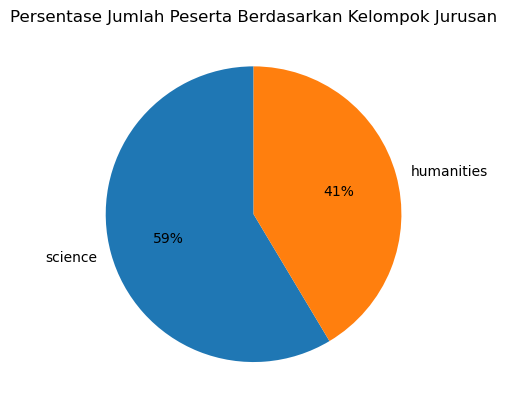

In [46]:
data = combined_data.drop(combined_data[combined_data['fm_type'] != 
                          combined_data['sm_type']].index)['fm_type'].value_counts().values
labels = combined_data.drop(combined_data[combined_data['fm_type'] != 
                          combined_data['sm_type']].index)['fm_type'].value_counts().index

plt.pie(data, labels=labels, autopct="%2.f%%", startangle=90)
plt.title('Persentase Jumlah Peserta Berdasarkan Kelompok Jurusan')
plt.show()

### Kampus mana dengan pendaftar terbanyak?

In [48]:
#Membuat fungsi untuk memvisualisasikan jumlah total pendaftar masing-masing kampus
def countplot(data, first_univ, second_univ, name):
    data1 = data.groupby(first_univ)['id_user'].count().reset_index(name='Count First Univ')
    data2 = data.groupby(second_univ)['id_user'].count().reset_index(name='Count Second Univ')
    combined_data = pd.merge(data1, data2, how='left', left_on=first_univ, right_on=second_univ).fillna(0).drop(
        'second_univ', axis=1
    )
    combined_data.rename(columns={'first_univ':'universities'}, inplace=True)
    combined_data['Jumlah Pendaftar'] = combined_data['Count First Univ'] + combined_data['Count Second Univ']
    combined_data = combined_data.sort_values(by='Jumlah Pendaftar', ascending=False).head(10)

    plt.figure(figsize=(12,5))
    ax = sns.barplot(combined_data, y='universities', x='Jumlah Pendaftar', palette='viridis')
    for container in ax.containers:
        ax.bar_label(container, fmt='%d', padding=3)
    plt.title(f'Top 10 Kampus Dengan Pendaftar Terbanyak Pada Kelompok {name}')
    plt.show()

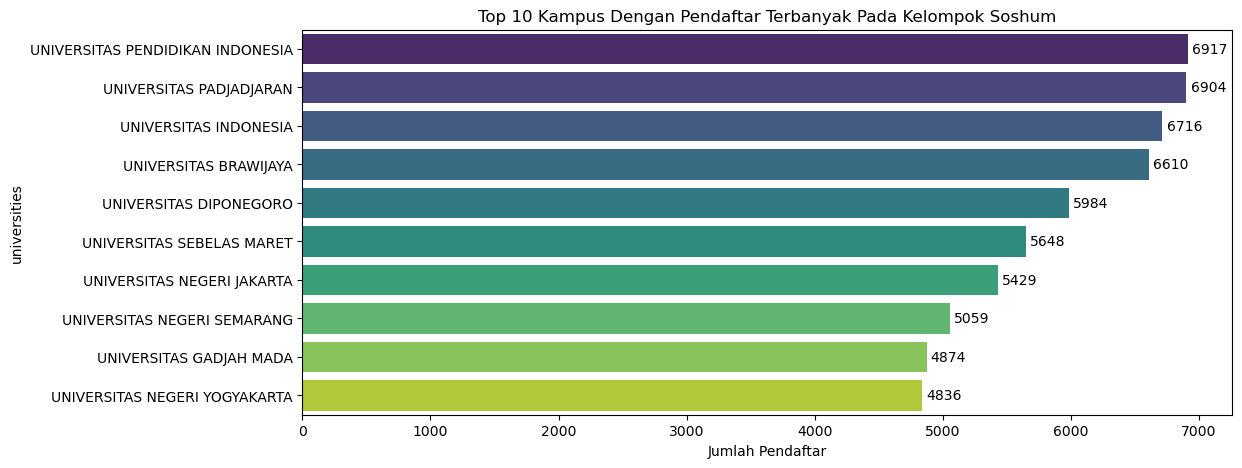

In [49]:
countplot(data_soshum, 'first_univ', 'second_univ', 'Soshum')

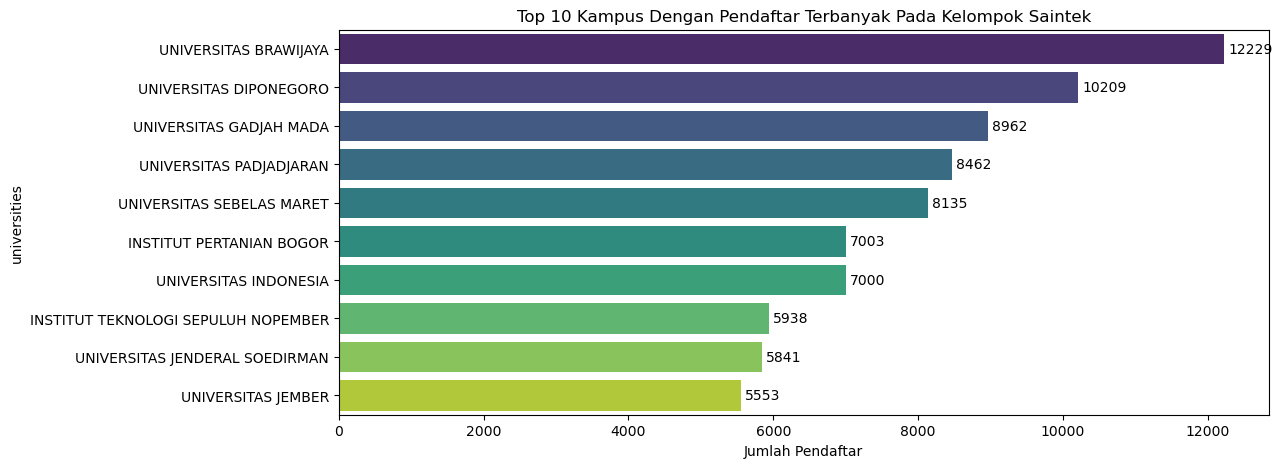

In [50]:
countplot(data_saintek, 'first_univ', 'second_univ', 'Saintek')

### Jurusan apa dengan pendaftar terbanyak?

In [52]:
#Membuat fungsi untuk memvisualisasikan jumlah total pendaftar masing-masing jurusan
def countplot(data, first_major, second_major, rumpun, nama_kategori):
    data1 = data.groupby(first_major)['id_user'].count().reset_index(name=
                'Count First Major') #Menghitung peserta yang memilih jurusan yang dipilih sebagai pilihan pertama
    data2 = data.groupby(second_major)['id_user'].count().reset_index(name=
                'Count Second Major') #Menghitung peserta yang memilih jurusan yang dipilih sebagai pilihan kedua
    
    combined_data = pd.merge(data1, data2, how='outer', left_on=first_major, right_on=second_major) #Menggabungkan keduanya
    combined_data['Jurusan'] = combined_data['fm_name'].fillna(combined_data['sm_name']) #Menyesuaikan nama jurusan

    combined_data['Count First Major'].fillna(0, inplace=True) #Isi 0 jika jurusan tidak dipilih di pilihan pertama
    combined_data['Count Second Major'].fillna(0, inplace=True) # Isi 0 jika jurusan tidak dipilih di pilihan kedua
    
    combined_data['Jumlah Pendaftar'] = combined_data[
        'Count First Major'] + combined_data['Count Second Major'] #Hitung total jumlah pendaftar
    combined_data = combined_data.sort_values(by=
        'Jumlah Pendaftar', ascending=False).head(10) #Mengurutkan dari 10 jurusan dengan pendaftar terbanyak

    #Memvisualisasikan hasil
    plt.figure(figsize=(12,5))
    ax = sns.barplot(combined_data, y=nama_kategori, x='Jumlah Pendaftar', palette='viridis')
    for container in ax.containers:
        ax.bar_label(container, fmt='%d', padding=3)
    plt.title(f'Top 10 Jurusan Dengan Pendaftar Terbanyak Pada Kelompok {rumpun}')
    plt.show()

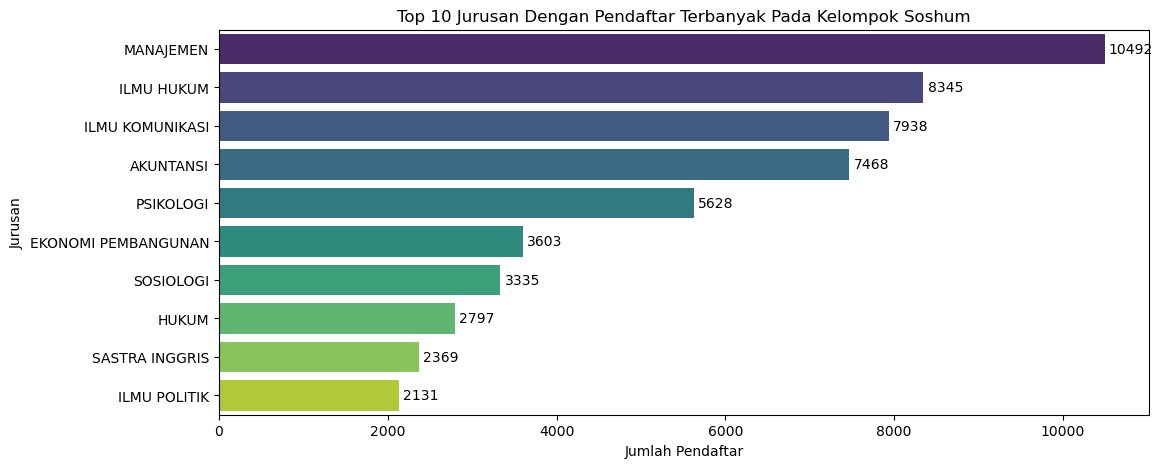

In [53]:
#Memvisualisasikan top 10 jurusan dengan pendaftar terbanyak
countplot(data_soshum, 'fm_name', 'sm_name', 'Soshum', 'Jurusan')

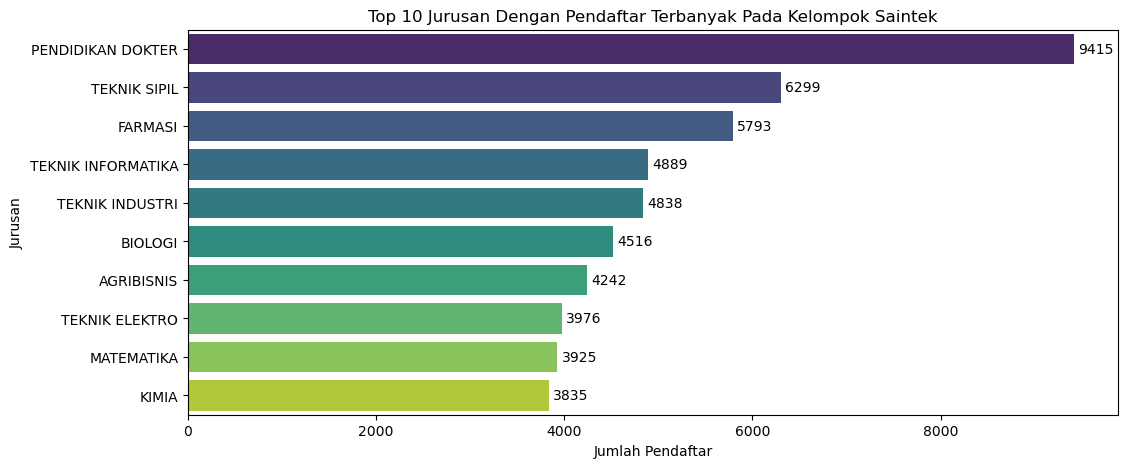

In [54]:
countplot(data_saintek, 'fm_name', 'sm_name', 'Saintek', 'Jurusan')

### Kampus mana dengan rata-rata skor UTBK tertinggi?

In [56]:
#Membuat fungsi untuk visualisasi rata-rata berdasarkan kategori tertentu
def mean(data, var, cat1, cat2, rumpun, nama_kategori, nama_variabel):
    data1 = data.groupby(cat1)['avg'].sum().reset_index(name='Total1')
    data1['count1'] = data.groupby(cat1).size().values
    
    data2 = data.groupby(cat2)['avg'].sum().reset_index(name='Total2')
    data2['count2'] = data.groupby(cat2).size().values
    
    data_mean = pd.merge(data1, data2, how='outer', left_on=cat1, right_on=cat2)
    data_mean[nama_kategori] = data_mean[cat1].fillna(data_mean[cat2])
    data_mean.fillna(0, inplace=True)
    
    data_mean['Total Nilai'] = data_mean['Total1'] + data_mean['Total2']
    data_mean['Total count'] = data_mean['count1'] + data_mean['count2']
    data_mean['Rata-Rata'] = data_mean['Total Nilai']/data_mean['Total count']
    data_mean = data_mean.sort_values(by='Rata-Rata', ascending=False).head(10)
    
    #data_mean = data_mean.drop([cat1,cat2, 'Total1', 'Total2', 'count1', 'count2'], axis=1)
    plt.figure(figsize=(15,6))
    ax = sns.barplot(data=data_mean, x='Rata-Rata', y=nama_kategori, palette='viridis')
    for container in ax.containers:
        ax.bar_label(container, fmt='%.3f', padding=3)
    plt.title(f'Top 10 {nama_kategori} Dengan Rata-Rata {nama_variabel} Tertinggi Pada Kelompok {rumpun}')
    plt.show()

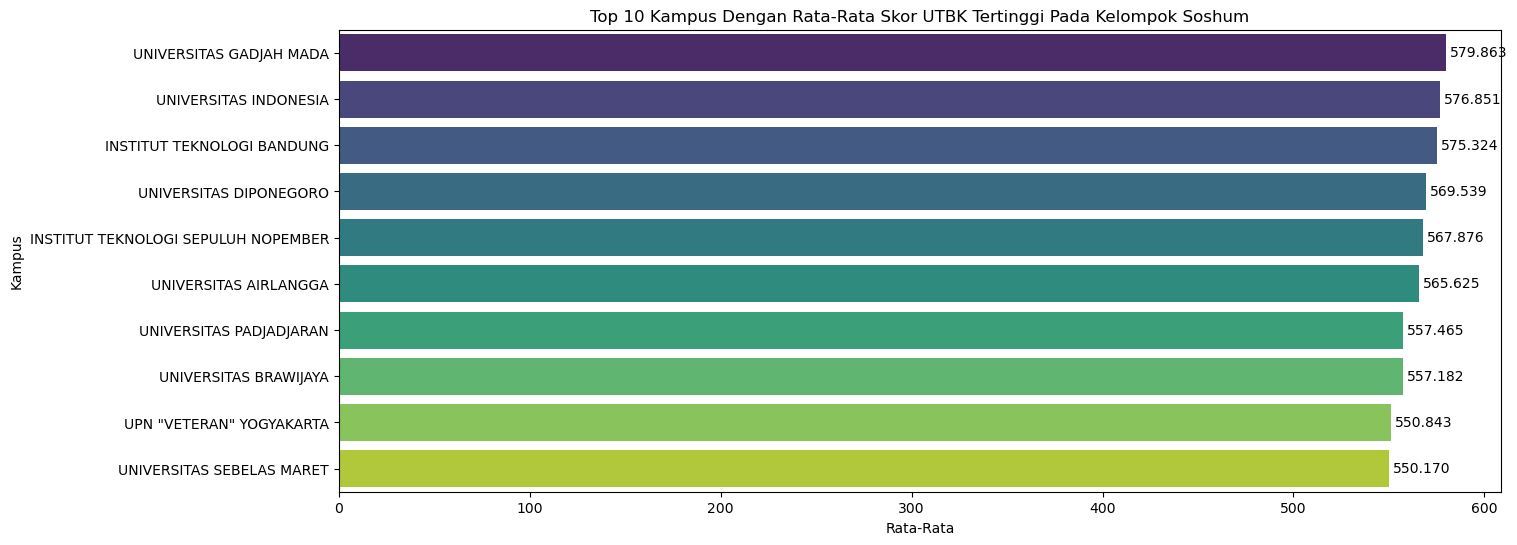

In [57]:
mean(data_soshum, 'avg', 'first_univ', 'second_univ', 'Soshum', 'Kampus', 'Skor UTBK')

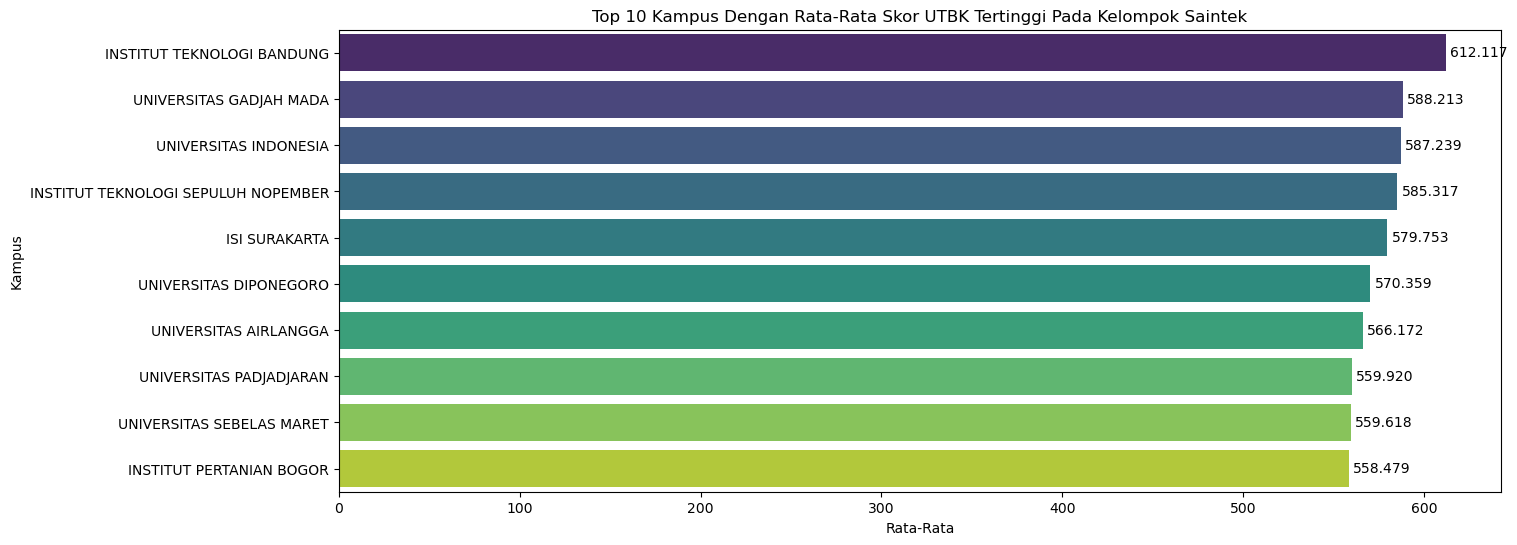

In [58]:
mean(data_saintek, 'avg', 'first_univ', 'second_univ', 'Saintek', 'Kampus', 'Skor UTBK')

### Jurusan apa dengan rata-rata skor UTBK tertinggi?

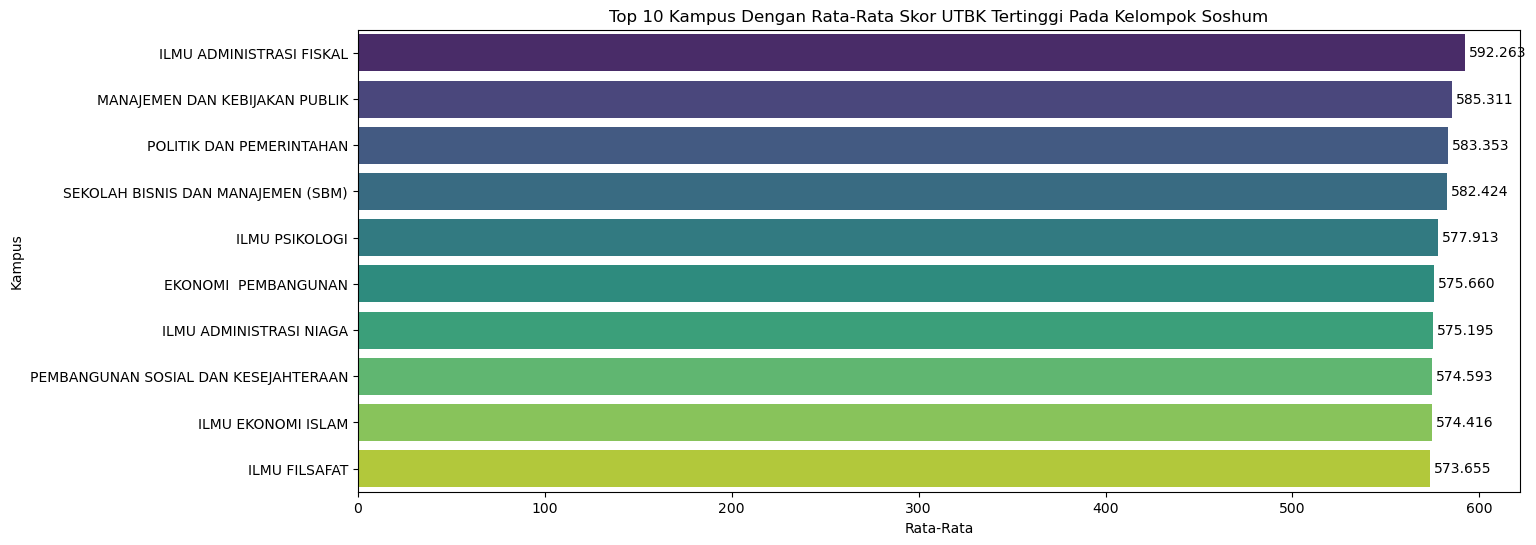

In [60]:
mean(data_soshum, 'avg', 'fm_name', 'sm_name', 'Soshum', 'Kampus', 'Skor UTBK')

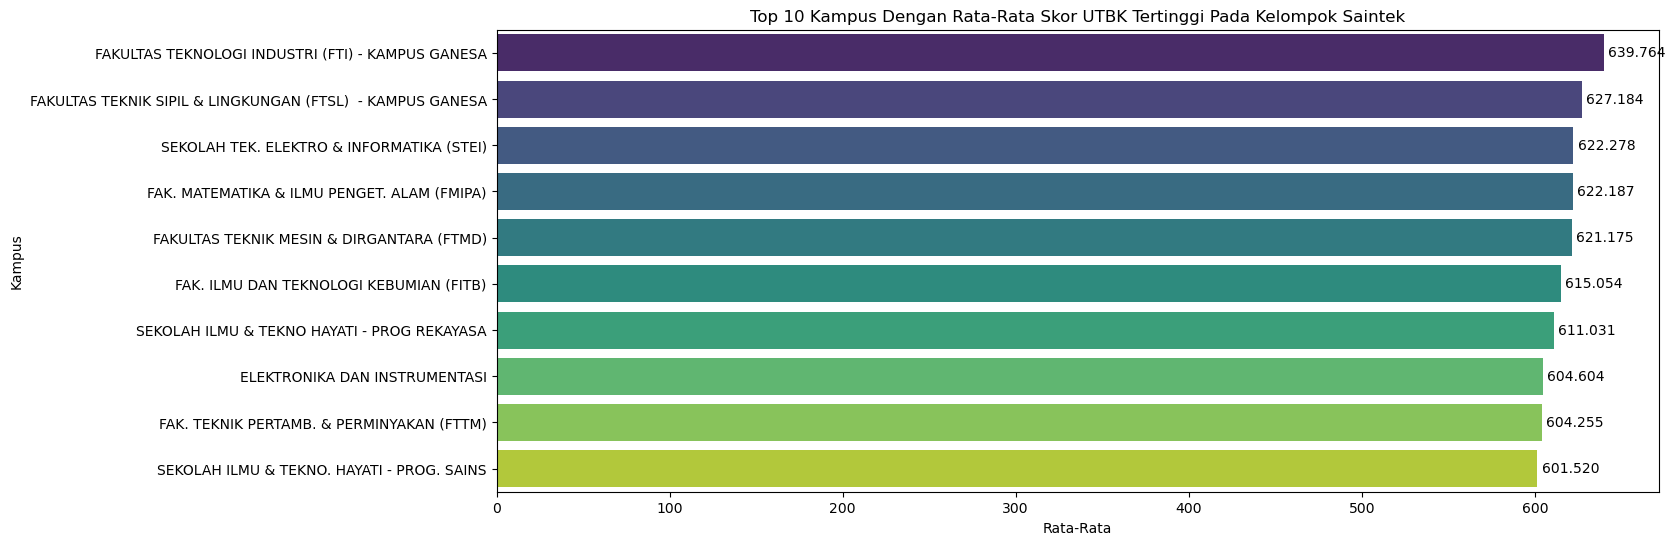

In [61]:
mean(data_saintek, 'avg', 'fm_name', 'sm_name', 'Saintek', 'Kampus', 'Skor UTBK')

### Bagaimana korelasi jumlah pendaftar dengan peluang penerimaan?

In [63]:
#Membuat fungsi untuk menghitung dan memvisualisasikan peluang penerimaan tiap jurusan
def prob(data, univ1, major1, capacity1, name1, univ2, major2, capacity2, name2):
    #Menghitung peluang penerimaan pada jurusan pilihan pertama
    fm = data.groupby([univ1, major1, capacity1])['id_user'].count().reset_index(name='Jumlah Pendaftar')
    fm = fm.drop(fm[fm['Jumlah Pendaftar'] <= fm[capacity1]].index) #Membuang anomali di mana kuota >= pendaftar
    fm['peluang_penerimaan'] = fm[capacity1]/fm['Jumlah Pendaftar'] #Menghitung tingkat keketatan

    #Menghitung peluang penerimaan pada jurusan pilihan kedua
    sm = data.groupby([univ2, major2, capacity2])['id_user'].count().reset_index(name='Jumlah Pendaftar')
    sm = sm.drop(sm[sm['Jumlah Pendaftar'] <= sm[capacity2]].index) #Membuang anomali di mana kuota >= pendaftar
    sm['peluang_penerimaan'] = sm[capacity2]/sm['Jumlah Pendaftar'] #Menghitung tingkat keketatan
    
    #Visualisasi hasi pada jurusan pilihan pertama
    fig, axs=plt.subplots(1,2, figsize=(18,6))
    sns.regplot(fm, x='Jumlah Pendaftar', y='peluang_penerimaan', ci=None, line_kws={'color':'red'}, ax=axs[0])
    axs[0].set_title(f'Hubungan Jumlah Pendaftar dengan Peluang Penerimaan Pada {name1}')

    #Visualisasi hasi pada jurusan pilihan kedua
    sns.regplot(sm, x='Jumlah Pendaftar', y='peluang_penerimaan', ci=None, line_kws={'color':'red'}, ax=axs[1])
    axs[1].set_title(f'Hubungan Jumlah Pendaftar dengan Peluang Penerimaan Pada {name2}')
    plt.show()

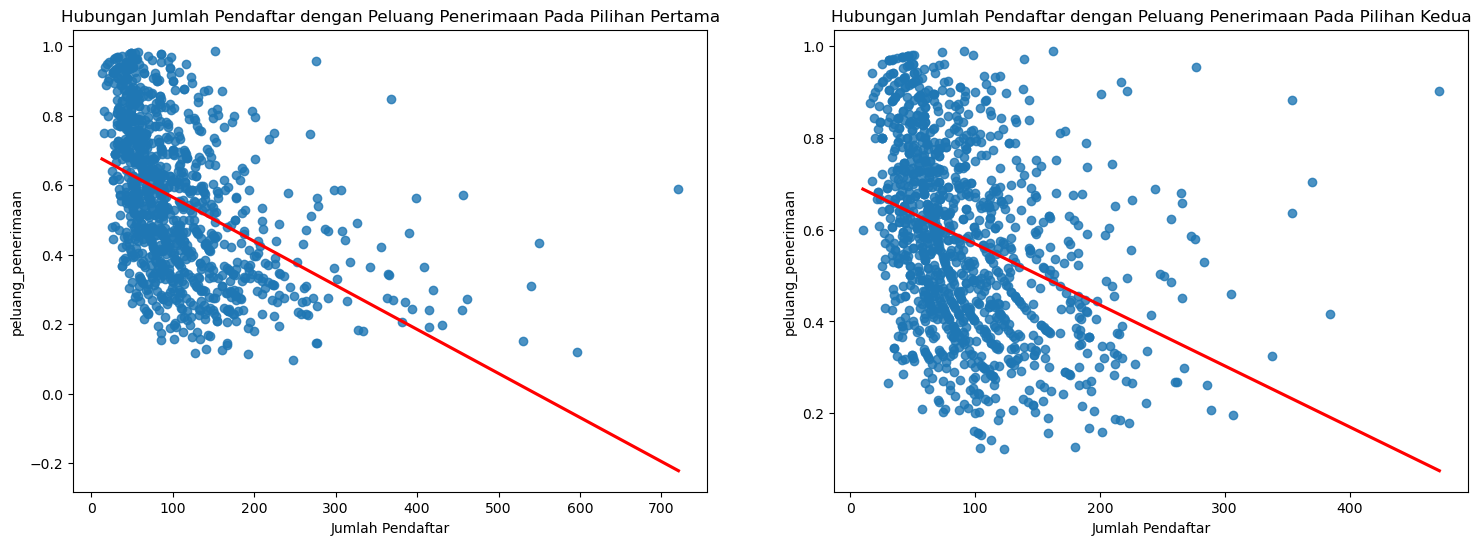

In [64]:
prob(combined_data, 'first_univ', 'fm_name', 'fm_capacity', 'Pilihan Pertama' , 'second_univ', 'sm_name', 'sm_capacity', 'Pilihan Kedua')

### Bagaimana perbandingan peserta soshum dengan saintek?

In [66]:
def plot2(data1, data2, var1, var2, nama1, nama2, subtest):
    fig, axs = plt.subplots(1, 2, figsize=(12, 4))
    
    sns.histplot(data=data1, x=var1, ax=axs[0], palette='viridis')
    axs[0].set_title(f'Distribusi {subtest} pada Kelompok {nama1}')
    axs[0].set_xlabel(subtest)
    axs[0].set_ylabel('Frekuensi')

    sns.histplot(data=data2, x=var2, ax=axs[1], palette='viridis')
    axs[1].set_title(f'Distribusi {subtest} pada Kelompok {nama2}')
    axs[1].set_xlabel(subtest)
    axs[1].set_ylabel('Frekuensi')

    fig.tight_layout()
    plt.show()

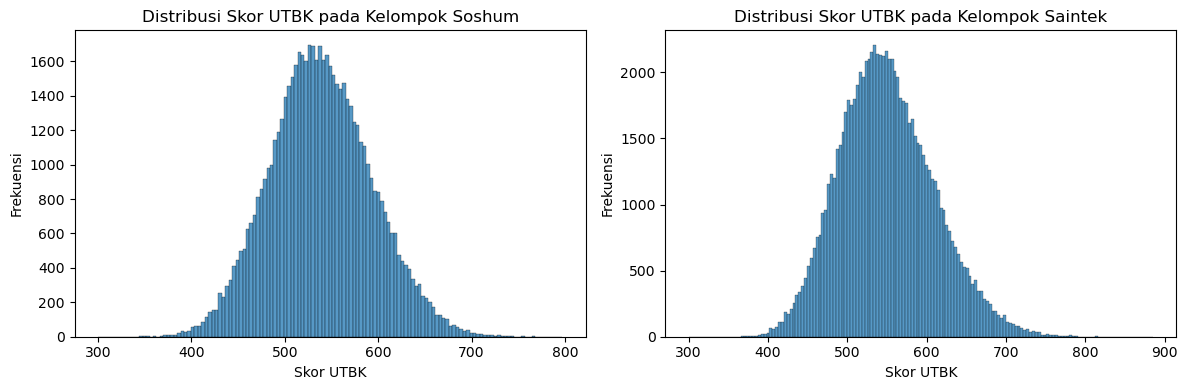

In [67]:
# Distribusi rata-rata skor UTBK berdasarkan kelompok soshum dan saintek
plot2(data_soshum, data_saintek, 'avg', 'avg', 'Soshum', 'Saintek', "Skor UTBK")

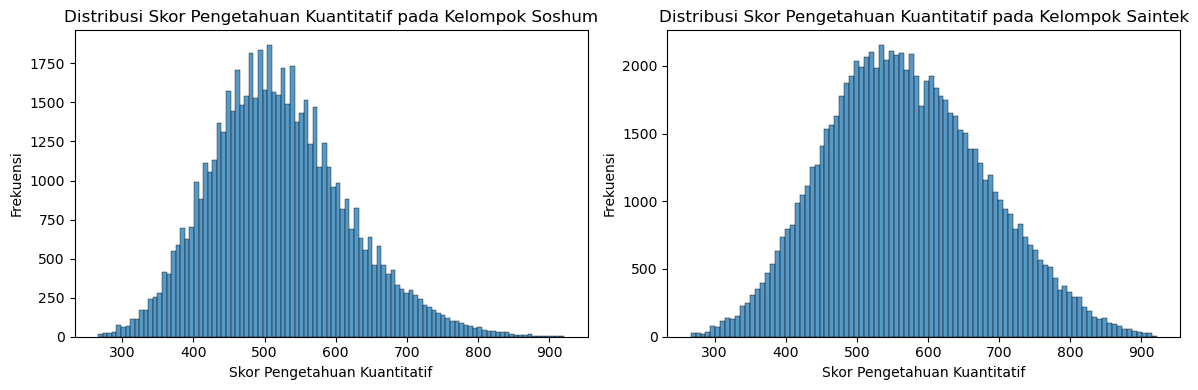

In [68]:
#Distribusi skor penalaran kuantitatif pada kelompok soshum dan saintek
plot2(data_soshum, data_saintek, 'score_kua', 'score_kua', 'Soshum', 'Saintek', 'Skor Pengetahuan Kuantitatif')

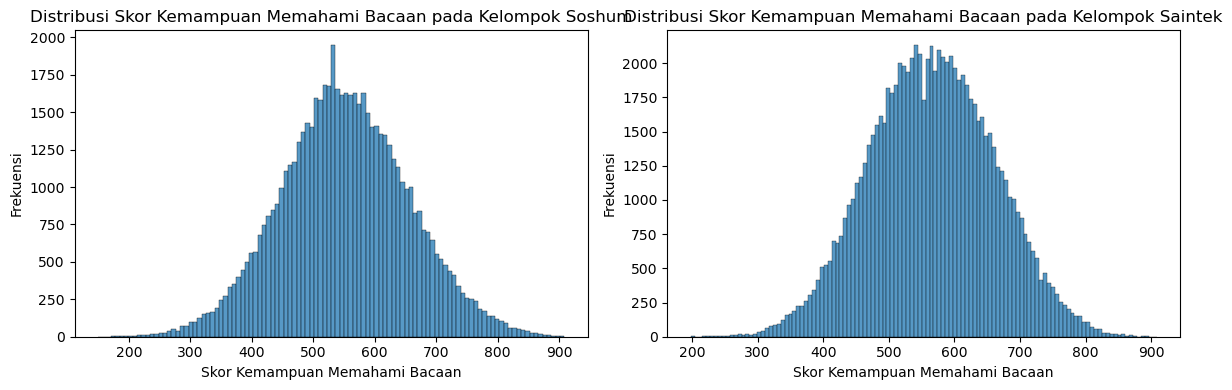

In [69]:
plot2(data_soshum, data_saintek, 'score_kmb', 'score_kmb', 'Soshum', 'Saintek','Skor Kemampuan Memahami Bacaan')

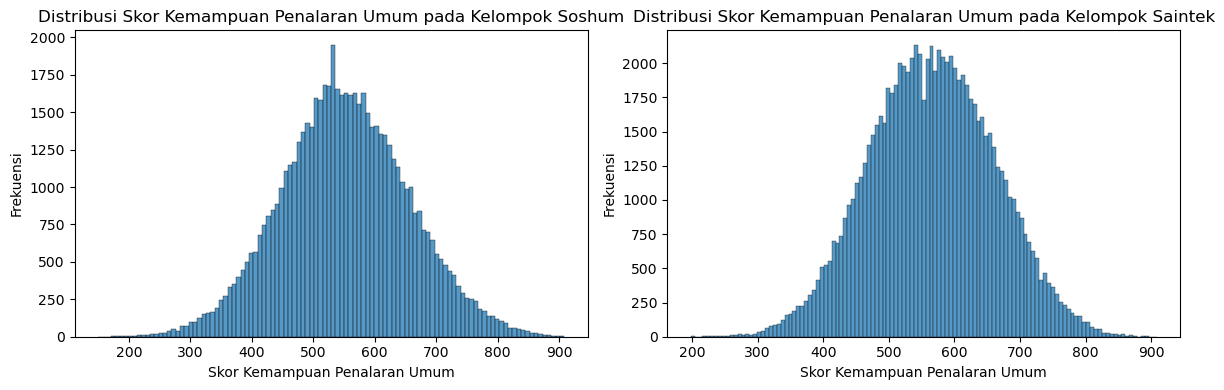

In [70]:
plot2(data_soshum, data_saintek, 'score_kmb', 'score_kmb', 'Soshum', 'Saintek','Skor Kemampuan Penalaran Umum')

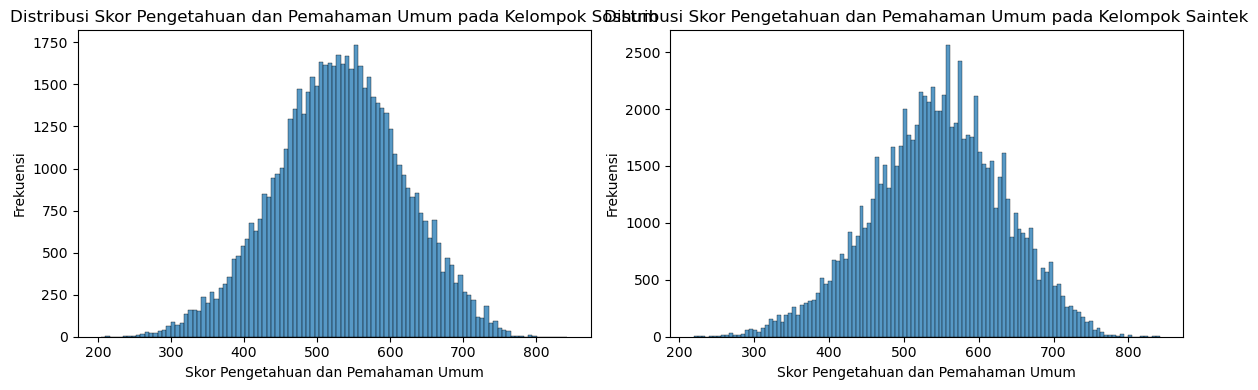

In [71]:
plot2(data_soshum, data_saintek, 'score_ppu', 'score_ppu', 'Soshum', 'Saintek','Skor Pengetahuan dan Pemahaman Umum')

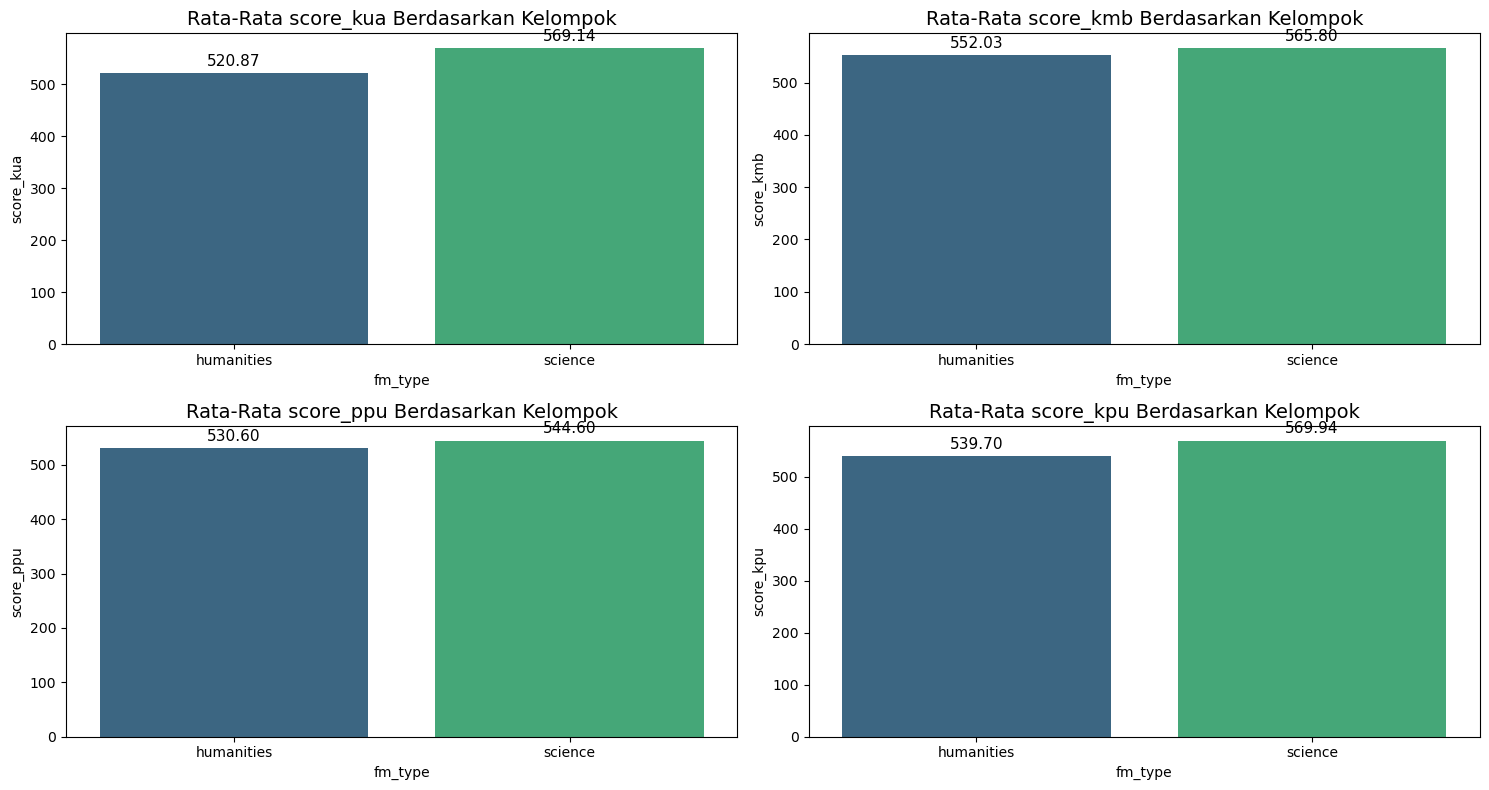

In [72]:
var = ['score_kua', 'score_kmb', 'score_ppu', 'score_kpu']
def plot_mean(data, vars_list):
    fig, axes = plt.subplots(2, 2, figsize=(15, 8))  
    axes = axes.flatten()  
    
    for i, var in enumerate(vars_list):
        ax = axes[i]  # Pilih subplot berdasarkan indeks
        df_mean = data.groupby('fm_type')[var].mean().reset_index()
        
        sns.barplot(data=df_mean, x='fm_type', y=var, ax=ax, palette='viridis')
        ax.set_title(f'Rata-Rata {var} Berdasarkan Kelompok', fontsize=14)

        # Menambahkan label pada setiap bar
        for container in ax.containers:
            ax.bar_label(container, fmt='%.2f', padding=3, fontsize=11)

    plt.tight_layout()  
    plt.show()

plot_mean(combined_data, var)

# Analisis Deskriptif Data Kelulusan

## Membuat fungsi untuk menentukan kelulusan

In [75]:
#Membuat fungsi untuk menentukan kelulusan peserta
def get_accepted_students(data):
    accepted_first_choice = pd.DataFrame()
    accepted_second_choice = pd.DataFrame()

    # Proses penerimaan per jurusan pilihan pertama
    for univ, major in data[['first_univ', 'fm_name']].drop_duplicates().values:
        first_choice_data = data[(data['first_univ'] == univ) & (data['fm_name'] == major)]
        first_choice_data_sorted = first_choice_data.sort_values(by='avg', ascending=False)
        fm_capacity = first_choice_data['fm_capacity'].values[0]

        # Ambil peserta yang diterima di pilihan pertama berdasarkan kuota
        accepted_first_choice_univ = first_choice_data_sorted.head(fm_capacity)
        accepted_first_choice = pd.concat([accepted_first_choice, accepted_first_choice_univ])

    # Proses penerimaan per jurusan pilihan kedua (hanya yang tidak diterima di pilihan pertama)
    remaining_data = data[~data['id_user'].isin(accepted_first_choice['id_user'])]

    for univ, major in remaining_data[['second_univ', 'sm_name']].drop_duplicates().values:
        second_choice_data = remaining_data[(remaining_data['second_univ'] == univ) & (remaining_data['sm_name'] == major)]
        second_choice_data_sorted = second_choice_data.sort_values(by='avg', ascending=False)
        sm_capacity = second_choice_data['sm_capacity'].values[0]

        # Ambil peserta yang diterima di pilihan kedua berdasarkan kuota
        accepted_second_choice_univ = second_choice_data_sorted.head(sm_capacity)
        accepted_second_choice = pd.concat([accepted_second_choice, accepted_second_choice_univ])

    return accepted_first_choice, accepted_second_choice

# Fungsi untuk menandai status penerimaan
def mark_acceptance_status(data, accepted_first_choice, accepted_second_choice):
    data['status'] = data['id_user'].apply(
        lambda x: 'Accepted at First Choice' if x in accepted_first_choice['id_user'].values else
                  ('Accepted at Second Choice' if x in accepted_second_choice['id_user'].values else 'Not Passed')
    )
    return data

In [76]:
# Menjalankan proses seleksi pada kelompok soshum
accepted_first_choice_soshum, accepted_second_choice_soshum = get_accepted_students(data_soshum)

# Menandai status penerimaan
data_soshum_with_status = mark_acceptance_status(data_soshum, accepted_first_choice_soshum, accepted_second_choice_soshum)

# Tampilkan hasil akhir dengan ID, jurusan, nilai rata-rata, dan status
data_soshum_with_status[['id_user', 'first_univ', 'fm_name', 'sm_name', 'second_univ', 'avg', 'status']].head()

,id_user,first_univ,fm_name,sm_name,second_univ,avg,status
0,32368,UNIVERSITAS SYIAH KUALA,MANAJEMEN,EKONOMI PEMBANGUNAN,UNIVERSITAS SYIAH KUALA,515.33,Accepted at First Choice
1,66250,UNIVERSITAS SYIAH KUALA,MANAJEMEN,EKONOMI PEMBANGUNAN,UNIVERSITAS SYIAH KUALA,560.56,Accepted at First Choice
2,208174,UNIVERSITAS SYIAH KUALA,MANAJEMEN,EKONOMI PEMBANGUNAN,UNIVERSITAS SYIAH KUALA,517.11,Accepted at First Choice
3,123221,UNIVERSITAS SYIAH KUALA,AKUNTANSI,EKONOMI PEMBANGUNAN,UNIVERSITAS SYIAH KUALA,571.11,Accepted at First Choice
4,214236,UNIVERSITAS SYIAH KUALA,AKUNTANSI,EKONOMI PEMBANGUNAN,UNIVERSITAS SYIAH KUALA,507.89,Accepted at First Choice


In [77]:
# Menjalankan proses seleksi pada kelompok saintek
accepted_first_choice_saintek, accepted_second_choice_saintek = get_accepted_students(data_saintek)

# Menandai status penerimaan
data_saintek_with_status = mark_acceptance_status(data_saintek, accepted_first_choice_saintek, accepted_second_choice_saintek)

# Tampilkan hasil akhir dengan ID, jurusan, nilai rata-rata, dan status
data_saintek_with_status[['id_user', 'first_univ', 'fm_name', 'sm_name', 'second_univ', 'avg', 'status']].head()

,id_user,first_univ,fm_name,sm_name,second_univ,avg,status
0,28207,UNIVERSITAS SYIAH KUALA,PENDIDIKAN DOKTER HEWAN,PENDIDIKAN DOKTER HEWAN,UNIVERSITAS SYIAH KUALA,617.62,Accepted at First Choice
1,169351,UNIVERSITAS SYIAH KUALA,PENDIDIKAN DOKTER HEWAN,PENDIDIKAN DOKTER HEWAN,UNIVERSITAS SYIAH KUALA,580.38,Accepted at First Choice
2,176179,UNIVERSITAS SYIAH KUALA,TEKNIK SIPIL,PENDIDIKAN DOKTER HEWAN,UNIVERSITAS SYIAH KUALA,502.12,Accepted at First Choice
3,337827,UNIVERSITAS SYIAH KUALA,TEKNIK SIPIL,PENDIDIKAN DOKTER HEWAN,UNIVERSITAS SYIAH KUALA,475.25,Accepted at First Choice
4,241715,UNIVERSITAS SYIAH KUALA,TEKNIK PERTANIAN,PENDIDIKAN DOKTER HEWAN,UNIVERSITAS SYIAH KUALA,540.50,Accepted at First Choice


## Persentase kelulusan

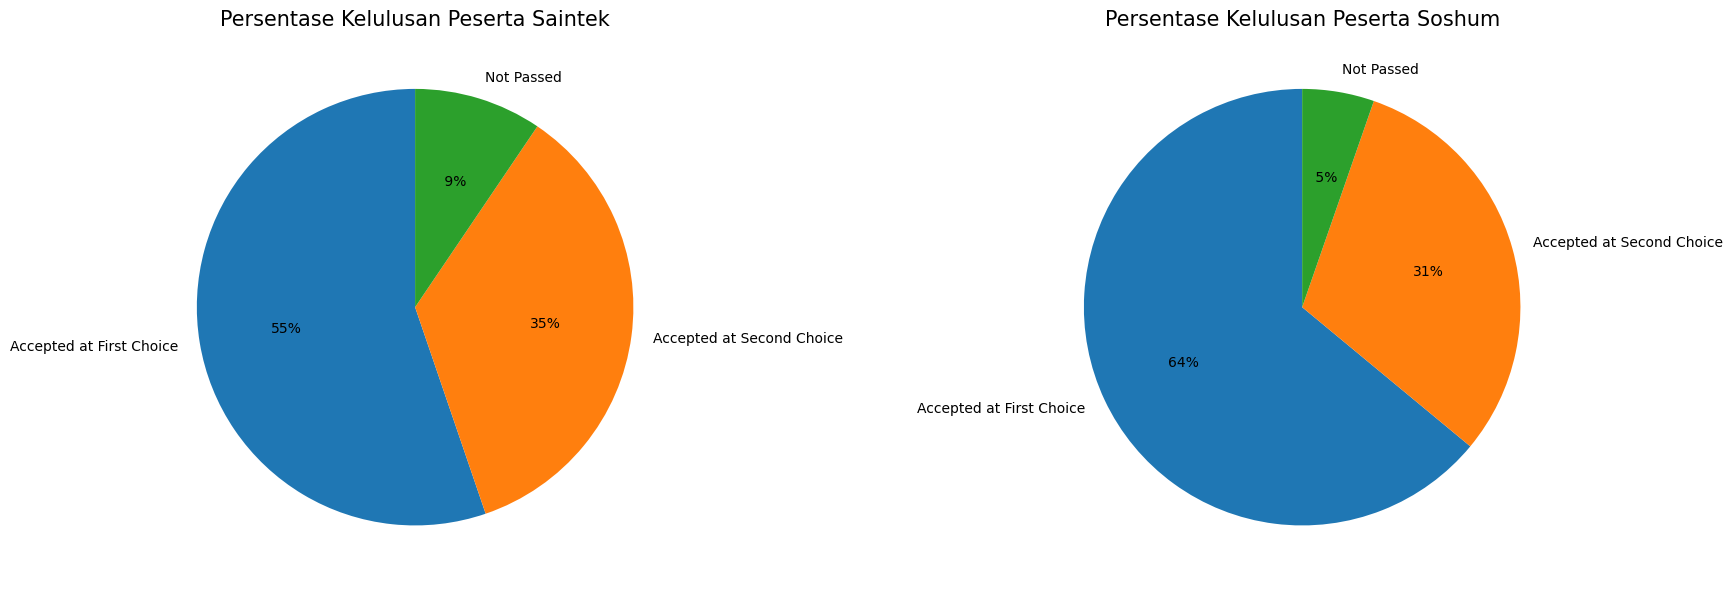

In [79]:
#Mengumpulkan data
saintek = data_saintek['status'].value_counts()
soshum = data_soshum['status'].value_counts()

#Membuat visualisasi pie plot
fig, axs = plt.subplots(1,2, figsize=(18,6))
axs[0].pie(saintek.values, labels=saintek.index, autopct="%2.f%%", startangle=90)
axs[0].set_title('Persentase Kelulusan Peserta Saintek', fontsize=15)

axs[1].pie(soshum.values, labels=soshum.index, autopct="%2.f%%", startangle=90)
axs[1].set_title('Persentase Kelulusan Peserta Soshum', fontsize=15)

fig.tight_layout()
plt.show()

## TIngkat keketatan per jurusan dan universitas

In [81]:
#Membuat fungsi untuk mengumpulkan data jumlah pendaftar dan kuota untuk masing-masing jurusan dan kampus 
#baik pada pilihan pertama maupun kedua

def competition(data, fm_name, sm_name, first_univ, second_univ, fm_capacity, sm_capacity, var):
    #Menghitung kuota penerimaan pada masing-masing jurusan dan kampus
    a = data.groupby([fm_name, first_univ])[fm_capacity].first().reset_index().rename(columns={'fm_name':'major', 
            'first_univ':'university', 'fm_capacity':'capacity'})

    b = data.groupby([sm_name, second_univ])[sm_capacity].first().reset_index().rename(columns={'sm_name':'major', 
            'second_univ':'university', 'sm_capacity':'capacity'})

    #Membuang potensi adanya baris duplikat
    kuota_per_jurusan = pd.concat([a,b]).drop_duplicates()

    #Menghitung total nilai peserta pada masing-masing jurusan dan kampus
    nilai_a = data.groupby([fm_name, first_univ])[var].sum().reset_index(name='Sum1').rename(columns={
        fm_name:'major', first_univ:'university'
    })
    nilai_b = data.groupby([sm_name, second_univ])[var].sum().reset_index(name='Sum2').rename(columns={
        sm_name:'major', second_univ:'university'
    })
    
    #Menghitung total nilai sebagai dasar perhitungan rata-rata
    jumlah_nilai = pd.merge(nilai_a, nilai_b, how='outer', on=['major', 'university'])
    jumlah_nilai.fillna(0, inplace=True)
    jumlah_nilai['Total Nilai'] = jumlah_nilai['Sum1'] + jumlah_nilai['Sum2']
    jumlah_nilai = jumlah_nilai.drop(['Sum1', 'Sum2'], axis=1)

    #Menghitung jumlah pendaftar pada masing-masing jurusan dan kampus
    pendaftar_a = data.groupby([fm_name, first_univ])['id_user'].count().reset_index(name='Count1').rename(columns={
        'fm_name':'major', 'first_univ':'university'
    })
    pendaftar_b = data.groupby([sm_name, second_univ])['id_user'].count().reset_index(name='Count2').rename(columns={
        'sm_name':'major', 'second_univ':'university'
    })

    #Menggabungkan data pendaftar
    jumlah_pendaftar = pd.merge(pendaftar_a, pendaftar_b, how='outer', on=['major', 'university']).fillna(0)
    jumlah_pendaftar['Jumlah Pendaftar'] = jumlah_pendaftar['Count1'] + jumlah_pendaftar['Count2']
    jumlah_pendaftar.drop(['Count1', 'Count2'], axis=1, inplace=True)

    #Menggabungkan data jumlah pendaftar dengan data kuota dan jumlah nilai per jurusan dan universitas
    data_persaingan = pd.merge(kuota_per_jurusan, jumlah_pendaftar, how='inner', on=['major', 'university'])
    data_persaingan = pd.merge(data_persaingan, jumlah_nilai, how='inner', on=['major', 'university'])
    data_persaingan = data_persaingan.drop(data_persaingan[data_persaingan['Jumlah Pendaftar'] <= data_persaingan['capacity']].index)
    data_persaingan['Peluang Lulus'] = round(data_persaingan['capacity']/data_persaingan['Jumlah Pendaftar'],4)
    data_persaingan['Rata-Rata Skor'] = round(data_persaingan['Total Nilai']/data_persaingan['Jumlah Pendaftar'],2)
    data_persaingan.drop('Total Nilai', axis=1, inplace=True)
    data_persaingan = data_persaingan.sort_values(by='Peluang Lulus', ascending=True)
    return data_persaingan

In [82]:
soshum = competition(data_soshum, 'fm_name', 'sm_name', 'first_univ', 'second_univ', 'fm_capacity', 'sm_capacity', 'avg')
soshum.head(10)

,major,university,capacity,Jumlah Pendaftar,Peluang Lulus,Rata-Rata Skor
554,KRIMINOLOGI,UNIVERSITAS INDONESIA,24,368.0,0.0652,564.37
113,BAHASA DAN KEBUDAYAAN KOREA,UNIVERSITAS INDONESIA,15,201.0,0.0746,547.84
346,ILMU HUBUNGAN INTERNASIONAL,UNIVERSITAS INDONESIA,22,263.0,0.0837,577.15
656,PARIWISATA,UNIVERSITAS GADJAH MADA,23,266.0,0.0865,552.31
1132,PSIKOLOGI,UNIVERSITAS NEGERI YOGYAKARTA,32,358.0,0.0894,546.02
445,ILMU KOMUNIKASI,UNIVERSITAS NEGERI YOGYAKARTA,32,345.0,0.0928,536.91
600,MANAJEMEN,UNIVERSITAS PADJADJARAN,40,409.0,0.0978,558.63
427,ILMU KOMUNIKASI,UNIVERSITAS INDONESIA,40,386.0,0.1036,570.69
412,ILMU KESEJAHTERAAN SOSIAL,UNIVERSITAS INDONESIA,24,227.0,0.1057,576.95
1185,SASTRA INGGRIS,UNIVERSITAS INDONESIA,20,184.0,0.1087,561.99


In [83]:
saintek = competition(data_saintek, 'fm_name', 'sm_name', 'first_univ', 'second_univ', 'fm_capacity', 'sm_capacity', 'avg')
saintek.head(10)

,major,university,capacity,Jumlah Pendaftar,Peluang Lulus,Rata-Rata Skor
506,KEDOKTERAN GIGI,UNIVERSITAS DIPONEGORO,13,189.0,0.0688,566.22
262,FARMASI,"UPN ""VETERAN"" JAKARTA",15,210.0,0.0714,523.72
1042,PERENCANAAN WILAYAH DAN KOTA (PWK),UNIVERSITAS SEBELAS MARET,23,310.0,0.0742,544.57
1180,TEKNIK BIOMEDIS,UNIVERSITAS INDONESIA,16,207.0,0.0773,578.81
125,ARSITEKTUR INTERIOR,UNIVERSITAS INDONESIA,20,254.0,0.0787,571.02
350,ILMU AKTUARIA,UNIVERSITAS GADJAH MADA,18,228.0,0.0789,573.54
1318,TEKNIK INFORMATIKA,UNIVERSITAS PADJADJARAN,40,500.0,0.0800,555.73
1591,TEKNOLOGI INFORMASI,UNIVERSITAS NEGERI YOGYAKARTA,16,195.0,0.0821,534.45
857,PENDIDIKAN DOKTER GIGI,UNIVERSITAS JENDERAL SOEDIRMAN,25,274.0,0.0912,556.90
1156,STATISTIKA,UNIVERSITAS NEGERI YOGYAKARTA,16,171.0,0.0936,554.86


<Figure size 2000x800 with 0 Axes>

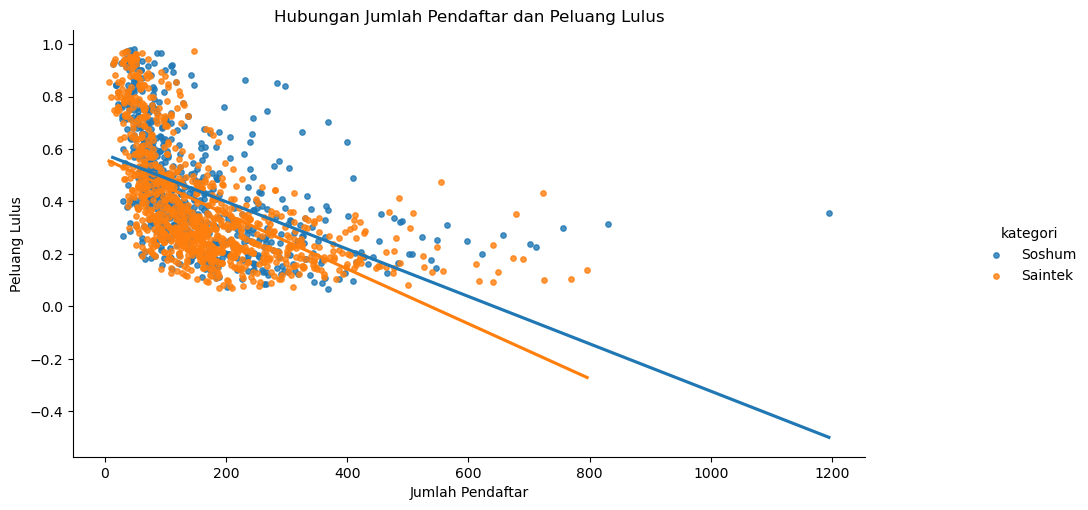

In [84]:
soshum['kategori'] = 'Soshum'
saintek['kategori'] = 'Saintek'

data = pd.concat([soshum, saintek])
#data = data.drop(data[data['kategori'] == 'Soshum']['Jumlah Pendaftar'].nlargest(1).index)

plt.figure(figsize=(20,8))
g = sns.lmplot(data=data, x='Jumlah Pendaftar', y='Peluang Lulus', hue='kategori', scatter_kws={'s':15}, ci=None)
g.fig.set_size_inches(12, 5)
plt.title('Hubungan Jumlah Pendaftar dan Peluang Lulus')
plt.show()

## Persebaran data nilai peserta yang lulus

In [86]:
# Membuat fungsi untuk menghitung nilai min median dan max peserta yang lulus di masing-masing jurusan dan kampus
def data_peserta_lulus(data):
    # Menyaring data hanya peserta yang lulus
    valid_data = data[data['status'] != 'Not Passed']

    # Gabungkan data untuk pilihan pertama dan kedua
    first_choice = valid_data[['first_univ', 'fm_name', 'avg']].rename(columns={'first_univ':'university', 'fm_name':'major', 'avg':'score'})
    second_choice = valid_data[['second_univ', 'sm_name', 'avg']].rename(columns={'second_univ':
                                                'university', 'sm_name':'major', 'avg':'score'})

    # Gabungkan pilihan pertama dan kedua dalam satu DataFrame
    combined_data = pd.concat([first_choice, second_choice])

    # Hitung nilai Min, Median, dan Max berdasarkan kombinasi jurusan dan kampus
    data_lulus = combined_data.groupby(['university', 'major']).agg(
        Min=('score', 'min'),
        Median=('score', 'median'),
        Max=('score', 'max')
    ).reset_index()

    data_lulus = data_lulus[~((data_lulus['Min'] == data_lulus['Median']) & 
                              (data_lulus['Median'] == data_lulus['Max']))]

    # Tampilkan hasil
    return data_lulus

In [187]:
lulus_soshum = data_peserta_lulus(data_soshum)
lulus_soshum.head().sort_values(by='Min', ascending=False)

,university,major,Min,Median,Max
2,INSTITUT TEKNOLOGI BANDUNG,FAKULTAS SENIRUPA DAN DESAIN (FSRD) - KAMPUS C...,466.00,571.44,703.11
9,INSTITUT TEKNOLOGI SEPULUH NOPEMBER,STUDI PEMBANGUNAN,463.89,571.44,705.56
1,INSTITUT TEKNOLOGI BANDUNG,FAKULTAS SENIRUPA DAN DESAIN (FSRD),426.00,577.00,703.11
4,INSTITUT TEKNOLOGI BANDUNG,SEKOLAH BISNIS DAN MANAJEMEN (SBM),406.22,596.00,797.33
8,INSTITUT TEKNOLOGI SEPULUH NOPEMBER,MANAJEMEN BISNIS,354.78,576.33,720.78


In [189]:
lulus_saintek = data_peserta_lulus(data_saintek).head()
lulus_saintek.head().sort_values(by='Min', ascending=False)

,university,major,Min,Median,Max
5,INSTITUT PERTANIAN BOGOR,ARSITEKTUR LANSEKAP,457.00,581.000,689.88
3,INSTITUT PERTANIAN BOGOR,AKTUARIA,446.00,590.440,724.50
6,INSTITUT PERTANIAN BOGOR,BIOKIMIA,429.62,571.185,711.00
2,INSTITUT PERTANIAN BOGOR,AGRONOMI DAN HORTIKULTURA,428.12,561.750,680.12
0,INSTITUT PERTANIAN BOGOR,AGRIBISNIS,422.38,558.690,679.62


In [89]:
#Cek data pada jurusan EP UNS
lulus_soshum[(lulus_soshum['university'] == 'UNIVERSITAS SEBELAS MARET') & (lulus_soshum['major'] == 'EKONOMI PEMBANGUNAN')]

,university,major,Min,Median,Max
1178,UNIVERSITAS SEBELAS MARET,EKONOMI PEMBANGUNAN,448.56,568.89,686.78


In [90]:
#Cek data pada jurusan IE UGM
lulus_soshum[(lulus_soshum['university'] == 'UNIVERSITAS GADJAH MADA') & (lulus_soshum['major'] == 'ILMU EKONOMI')]

,university,major,Min,Median,Max
221,UNIVERSITAS GADJAH MADA,ILMU EKONOMI,484.0,615.11,741.0


## Peserta dengan nilai tinggi tetapi tidak lulus

In [92]:
#Menentukan threshold nilai tinggi (persentil ke 80)
threshold_saintek = data_saintek_with_status["avg"].quantile(0.80)
threshold_soshum = data_soshum_with_status["avg"].quantile(0.80)

#Mencari peserta dengan nilai tinggi tetapi tidak lolos pada kelompok saintek
peserta_anomali_saintek = data_saintek_with_status[(data_saintek_with_status["avg"] >= 
                        threshold_saintek) & (data_saintek_with_status["status"] == "Not Passed")]
peserta_anomali_soshum = data_soshum_with_status[(data_soshum_with_status["avg"] >= 
                        threshold_soshum) & (data_soshum_with_status["status"] == "Not Passed")]

#Menampilkan hasil
print(f"Jumlah peserta dengan nilai tinggi tetapi tidak lolos UTBK: {len(peserta_anomali_saintek) + len(peserta_anomali_soshum)}")
print(f"Jumlah peserta soshum: {len(peserta_anomali_soshum)}")
print(f"Jumlah peserta soshum: {len(peserta_anomali_saintek)}")

Jumlah peserta dengan nilai tinggi tetapi tidak lolos UTBK: 10
Jumlah peserta soshum: 4
Jumlah peserta soshum: 6


# Analisis Statistik Data Kelulusan

## Apakah ada perbedaan nilai yang signifikan antara peserta lulus dengan yang tidak lulus?

In [95]:
import scipy.stats as stats
from scipy.stats import kstest, norm

#Membuat fungsi untuk menguji normalitas data
def normal_test(data):  
    stat, p = kstest(data, 'norm', args=(data.mean(), data.std()))
    print(f'Statistik Uji: {stat}, p-value: {p}')

    if p > 0.05:
        print(f"Hasil: Data berdistribusi normal")
    else:
        print(f"Hasil: Data tidak berdistribusi normal")

#Menggabungkan data soshum dan saintek menjadi satu
df = pd.concat([data_soshum_with_status, data_saintek_with_status])

#Mengelompokkan data menjadi lulus dan tdk lulus
lulus = df[(df['status'] == 'Accepted at First Choice') | (df['status'] == 'Accepted at Second Choice')]['avg']
tdk_lulus = df[df['status'] == 'Not Passed']['avg']

In [96]:
#Uji normalitas pada data peserta yang lulus
normal_test(lulus)

Statistik Uji: 0.020687398211882035, p-value: 4.1576899458523567e-51
Hasil: Data tidak berdistribusi normal


In [97]:
#Uji normalitas pada data peserta yang tidak lulus
normal_test(tdk_lulus)

Statistik Uji: 0.0062621943029445015, p-value: 0.7575992141459714
Hasil: Data berdistribusi normal


In [98]:
from scipy.stats import mannwhitneyu

# Ada data yang tidak normal, sehingga tidak bisa menggunakan t test karena t test mengharuskan dua kelompok berdistribusi normal
# Oleh karena itu, digunakan Uji Mann-Whitney sebagai alternatif
def mw_test(cat1, cat2, name1, name2):
    stat, p = mannwhitneyu(cat1, cat2)
    print(f"P-value = {p}")

    if p < 0.05:
        print(f"Kesimpulan = Ada perbedaan yang signifikan antara {name1} dengan {name2}.")
    else:
        print(f"Kesimpulan = Tidak perbedaan perbedaan yang signifikan antara {name1} dengan {name2}.")

In [99]:
#Melakukan uji beda 2 kelompok
mw_test(lulus, tdk_lulus, 'peserta yang lolos UTBK', 'peserta yang tidak lolos UTBK')

P-value = 0.0
Kesimpulan = Ada perbedaan yang signifikan antara peserta yang lolos UTBK dengan peserta yang tidak lolos UTBK.


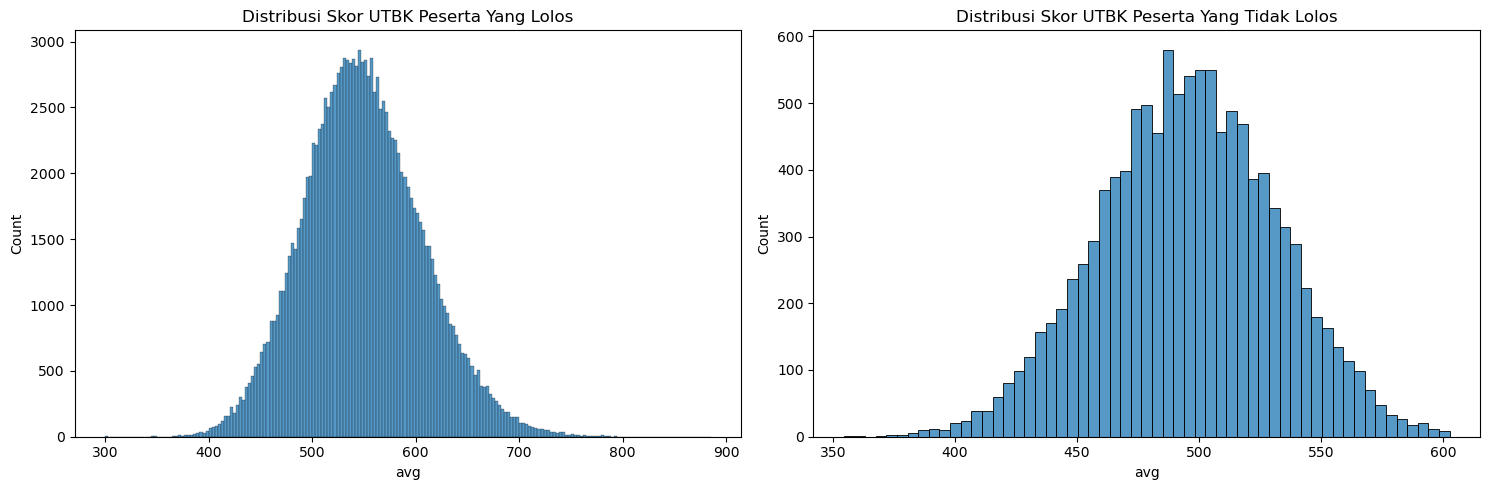

In [100]:
#Memvisualisasikan data
fig, axs = plt.subplots(1,2, figsize=(15,5))

sns.histplot(lulus, ax=axs[0])
axs[0].set_title('Distribusi Skor UTBK Peserta Yang Lolos')

sns.histplot(tdk_lulus, ax=axs[1])
axs[1].set_title('Distribusi Skor UTBK Peserta Yang Tidak Lolos')

fig.tight_layout()
plt.show()

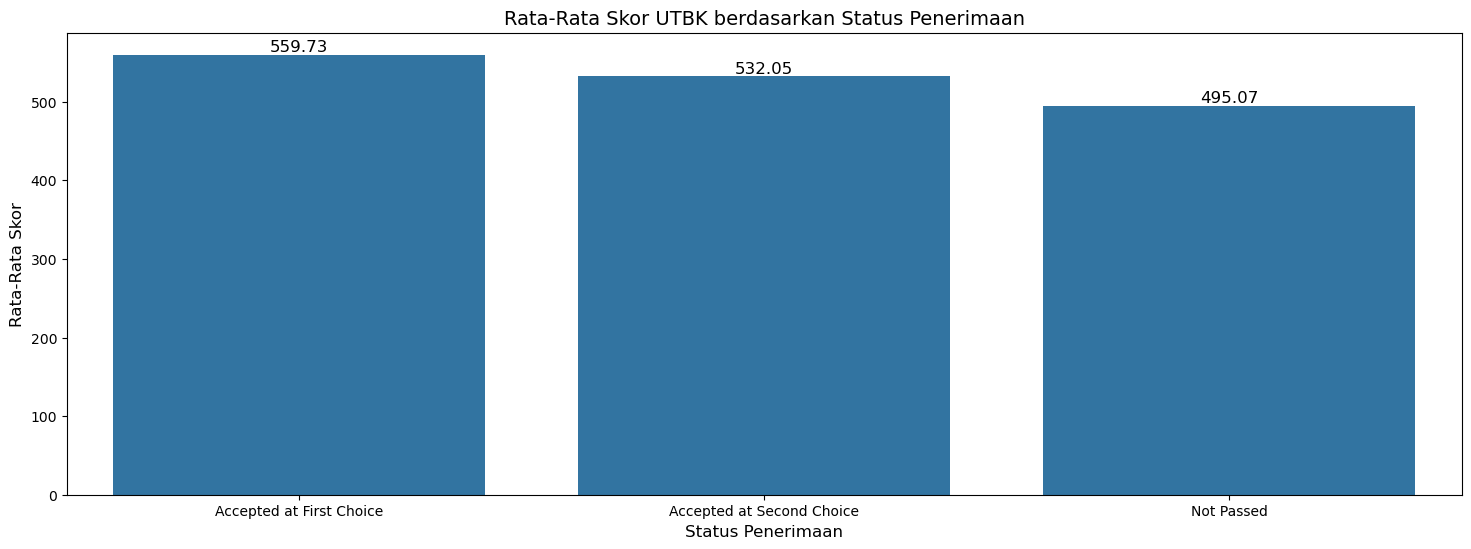

In [101]:
combined_data = pd.concat([data_soshum_with_status, data_saintek_with_status])

plt.figure(figsize=(18,6))
ax = sns.barplot(combined_data.groupby('status')['avg'].mean().reset_index(name='Rata-Rata Skor'), x='status', y='Rata-Rata Skor')
for p in ax.patches:
    ax.annotate(f"{p.get_height():.2f}", 
                (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom', fontsize=12, color='black')

plt.title("Rata-Rata Skor UTBK berdasarkan Status Penerimaan", fontsize=14)
plt.xlabel("Status Penerimaan", fontsize=12)
plt.ylabel("Rata-Rata Skor", fontsize=12)

plt.show()

## Apakah ada korelasi signifikan antara peningkatan jumlah pendaftar dengan peluang lulus?

In [103]:
df = pd.concat([saintek,soshum])

In [104]:
#Mengumpulkan data
x = df['Jumlah Pendaftar']
y = df['Peluang Lulus']

# Uji normalitas (Shapiro-Wilk Test)
stat_x, p_x = stats.shapiro(x)
stat_y, p_y = stats.shapiro(y)

print(f"Normalitas Final Score: p = {p_x}")
print(f"Normalitas Avg: p = {p_y}")

# Pilih uji korelasi berdasarkan normalitas
if p_x > 0.05 and p_y > 0.05:
    # Jika kedua variabel normal, gunakan Pearson
    corr, p = stats.pearsonr(x, y)
    test_used = "Pearson"
else:
    # Jika ada yang tidak normal, gunakan Spearman
    corr, p = stats.spearmanr(x, y)
    test_used = "Spearman"

# Tampilkan hasil
print(f"Uji Korelasi {test_used}: r = {corr}, p-value = {p}")

# Interpretasi hasil
if p < 0.05:
    print("Ya, ada korelasi signifikan!")
else:
    print("Tidak ada korelasi signifikan.")

Normalitas Final Score: p = 5.233633410920527e-39
Normalitas Avg: p = 6.025699572335204e-29
Uji Korelasi Spearman: r = -0.6880262038481906, p-value = 2.7714821707724293e-239
Ya, ada korelasi signifikan!


## Apakah masuk kampus TOP 3 lebih sulit dibanding kampus lainnya?

In [106]:
data_top3 = pd.concat([saintek, soshum])
top_3 = ['UNIVERSITAS INDONESIA', 'UNIVERSITAS GADJAH MADA', 'INSTITUT TEKNOLOGI BANDUNG']

# Buat kolom kategori berdasarkan first_univ (pilihan pertama)
data_top3['category'] = data_top3['university'].apply(lambda x: 'Top 3' if x in top_3 else 'Others')

#Menghitung kuota dan pendaftar kampus top 3 dan kampus non top 3
kuota_top3 = data_top3[data_top3['category'] == 'Top 3']['capacity'].sum()
tdk_diterima_top_3 = (data_top3[data_top3['category'] == 'Top 3']['Jumlah Pendaftar'].sum()) - kuota_top3

kuota_non_top3 = data_top3[data_top3['category'] != 'Top 3']['capacity'].sum()
tdk_diterima_non_top_3 = (data_top3[data_top3['category'] != 'Top 3']['Jumlah Pendaftar'].sum()) - kuota_non_top3

In [107]:
from scipy.stats import chi2_contingency

#Mengumpulkan data yang dibutuhkan
table = [[kuota_top3, tdk_diterima_top_3],  # PTN Top 3
         [kuota_non_top3, tdk_diterima_non_top_3]]  # PTN lainnya

#Uji Chi-Square
stat, p, dof, expected = chi2_contingency(table)

print(f"Chi-Square Test: p-value = {p}")

if p < 0.05:
    print("Hasil: Terdapat perbedaan signifikan dalam tingkat kelulusan PTN Top 3 vs lainnya.")
else:
    print("Hasil: Tidak ada perbedaan signifikan dalam tingkat kelulusan.")

Chi-Square Test: p-value = 0.0
Hasil: Terdapat perbedaan signifikan dalam tingkat kelulusan PTN Top 3 vs lainnya.


# Kesimpulan Hasil Analisis

Berdasarkan analisis data UTBK 2019 yang telah dilakukan, dapat ditarik beberapa kesimpulan utama sebagai berikut:

1. **Distribusi Peserta UTBK 2019**
   - Berdasarkan kategori kelompok peminatan, terdapat 59% peserta UTBK 2019 berasal dari rumpun Saintek sedangkan sisanya sebesar 41% berasal dari rumpun Soshum
3. **Kampus dan Jurusan Pendaftar Terbanyak**
   - Terdapat 6 kampus yang masuk ke dalam Top 10 kampus dengan pendaftar terbanyak baik soshum maupun saintek, yaitu: Universitas Indonesia, Universitas Gadjah Mada, Universitas Sebelas Maret, Universitas Brawijaya, Universitas Diponegoro, dan Universitas Padjadjaran.
   - Manajemen dan Pendidikan Dokter menjadi jurusan favorit dengan pendaftar terbanyak.
   - Selain itu, Universitas Indonesia, Universitas Gadjah Mada, dan Institut Teknologi Bandung menjadi 3 kampus dengan nilai rata-rata UTBK tertinggi.
5. **Kelulusan**
   - Dari total peserta saintek, sebanyak 55% peserta lolos pada pilihan pertama, 35% lolos pada pilihan kedua, dan 9% tidak lolos. Sementara itu, pada peserta soshum sebanyak 64% lolos pada pilihan pertama, 31% lolos pada pilihan kedua, dan 5% tidak lolos.
   - Universitas Indonesia & Universitas Gadjah Mada mendominasi pada daftar kampus dan jurusan dengan tingkat keketatan tertinggi.
   - Kriminologi dan Kedokteran Gigi menjadi jurusan dengan ketetatan tertinggi.
   - ITB, ITS, dan IPB membutuhkan nilai minimum yang tinggi untuk bersaing baik jurusan soshum maupun saintek.
   - Terdapat 10 perserta yang tidak lolos UTBK meskipun termasuk peserta dengan nilai UTBK tertinggi, yaitu soshum sebanyak 4 orang dan saintek sebanyak 6 orang.
7. **Uji Statistik**
   - Terdapat perbedaan signifikan dalam distribusi skor antara peserta yang diterima dan yang tidak diterima.Peserta yang diterima di pilihan pertama cenderung memiliki skor yang lebih tinggi dibandingkan kelompok lainnya.
   - Jumlah pendaftar berkorelasi negatif signifikan dengan peluang diterima.
   - Terdapat perbedaan yang signifikan dalam tingkat kelulusan antara PTN Top 3 (UI, UGM, ITB) dengan PTN lainnya.

In [196]:
# Menyimpan Dataset

In [194]:
data_soshum_with_status.to_csv('D:/Data Science/Dataset/Data UTBK 2019/data_soshum_status.csv', index-F)

,second_univ,first_univ,sm_type,sm_name,sm_capacity,fm_type,fm_name,fm_capacity,id_first_major,id_first_university,...,score_sos,score_mat,avg,highest_score_tps_subject,highest_score_tka_subject,same_univ,final_score,first_choice_id,second_choice_id,status
0,UNIVERSITAS SYIAH KUALA,UNIVERSITAS SYIAH KUALA,humanities,EKONOMI PEMBANGUNAN,64,humanities,MANAJEMEN,64,1112025,111,...,539,437,515.33,score_kpu,score_geo,yes,2248.4,100,1000,Accepted at First Choice
1,UNIVERSITAS SYIAH KUALA,UNIVERSITAS SYIAH KUALA,humanities,EKONOMI PEMBANGUNAN,64,humanities,MANAJEMEN,64,1112025,111,...,634,672,560.56,score_kmb,score_eko,yes,2412.2,100,1000,Accepted at First Choice
2,UNIVERSITAS SYIAH KUALA,UNIVERSITAS SYIAH KUALA,humanities,EKONOMI PEMBANGUNAN,64,humanities,MANAJEMEN,64,1112025,111,...,453,691,517.11,score_kmb,score_mat,yes,2275.8,100,1000,Accepted at First Choice
3,UNIVERSITAS SYIAH KUALA,UNIVERSITAS SYIAH KUALA,humanities,EKONOMI PEMBANGUNAN,64,humanities,AKUNTANSI,64,1112033,111,...,604,577,571.11,score_kmb,score_geo,yes,2498.6,101,1000,Accepted at First Choice
4,UNIVERSITAS SYIAH KUALA,UNIVERSITAS SYIAH KUALA,humanities,EKONOMI PEMBANGUNAN,64,humanities,AKUNTANSI,64,1112033,111,...,607,561,507.89,score_kpu,score_sos,yes,2197.8,101,1000,Accepted at First Choice
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61193,UNIVERSITAS PAPUA,UNIVERSITAS PAPUA,humanities,MANAJEMEN,32,humanities,EKONOMI PEMBANGUNAN,32,9212011,921,...,498,524,491.44,score_kua,score_eko,yes,2148.0,1120,2394,Accepted at First Choice
61194,UNIVERSITAS PAPUA,UNIVERSITAS PAPUA,humanities,MANAJEMEN,32,humanities,AKUNTANSI,32,9212057,921,...,421,476,498.44,score_kpu,score_eko,yes,2164.8,273,2394,Accepted at First Choice
61195,UNIVERSITAS PAPUA,UNIVERSITAS PAPUA,humanities,MANAJEMEN,32,humanities,PENDIDIKAN BAHASA INDONESIA,16,9212065,921,...,509,722,447.78,score_kmb,score_mat,yes,1939.2,1413,2394,Accepted at First Choice
61196,UNIVERSITAS PAPUA,UNIVERSITAS PAPUA,humanities,AKUNTANSI,32,humanities,MANAJEMEN,32,9212042,921,...,516,458,509.22,score_kpu,score_eko,yes,2221.4,272,2396,Accepted at First Choice
